# **Desafío 1. Análisis exploratorio de un dataset de precios de propiedades**
## Análisis dataset de propiedades(Properati), basado en venta de propiedades
 ---
#### Integrantes
- Alejo Di Lelle
- Mariano Fernandez Ferreyra
- Martina Garcia
- Rafael Giordano
- Alejo Paulisich Bustelo

 ---

# **Objetivo del trabajo**
- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar
estrategias para lidiar con los datos perdidos en ciertas variables.

- Realizar un análisis descriptivo de las principales variables.

- Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

# **Librerías**

In [61]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
#!pip install matplotlib==3.4.2
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 32.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


In [64]:
#Estas son las librerias que vamos a utilizar para el analisis de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import geopandas as gpd
import contextily as ctx

# **Import y lectura del dataset** 

Utilizamos drive para almacenar el archivo y poder ejecutarlo

In [65]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [66]:

link = 'https://drive.google.com/file/d/1NoCufB4xwfQF3sWIfZjSNQt7t0ipghDB/view?usp=sharing'


id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('properati.csv') 
 
df = pd.read_csv('properati.csv', index_col='Unnamed: 0')


In [67]:
# copiamos el data frame para no tener que descargarlo en caso de querer volver al original
data = df.copy()

# **Descripción del set de datos**

**Columnas**
- **Unnamed:** Es una columna con datos tipo int que tiene el mismo valor que el indice por lo cual no seria informacion valiosa para el analisis<br />
- **operation:** Es una columna con todos los valores iguales a "sell" que equivale a la "operacion venta" por lo cual tampoco es inforacion importante para el analisis<br />
- **propety_type:** Es una columna con tipo de dato string el cual tiene 4 categorias: "apartament", "house", "PH" y "store"<br />
- **place_name:** Es una columna con datos de tipo int64 que contiene los barrios/ciudades donde se encuentran las propiedades<br />
- **place_with_parent_names:** Contiene datos de tipo int64 con el detalle de cual es el lugar donde se encuentra la propiedad<br />
- **country_name:** Contiene todos valores igual a "Argentina" es decir que todas las propiedades son del mismo pais, por lo cual no es relevante<br />
- **state_name:** Corresponde a la provincia/ciudad donde se encuentra la propiedad<br />
- **geonames_id:**Es una columna con un tipo de dato float64 que contiene un id haciendo referencia a la localizacion geografica <br />
- **lat-lon:** Concatenacion de las coordenadas de la vivienda con un dato de tipo object (latitud y longitud)<br />
- **lat:** Latitud de la propiedad con un dato de tipo object<br />
- **lon:** Longitud de la propiedad con un dato de tipo object <br />
- **price:** Precio de venta de la propiedad con un dato de tipo object<br />
- **currency:** Tipo de moneda en la cual esta la venta de la propiedad con un dato de tipo object<br />
- **price_aprox_local_currency:** Precio aproximado en pesos de la propiedad con un dato de tipo float64<br /> 
- **price_aprox_usd:**Precio aproximado en dolares de la propiedad <br /> 
- **surface_total_in_m2:**Superficie total en metros cuadrados<br /> 
- **surface_covered_in_m2:**Superficie cubierta en metros cuadrados<br /> 
- **price_usd_per_m2:**Precio en dolares por metro cuadrado<br /> 
- **price_per_m2:**Precio por metro cuadrado en la moneda local<br /> 
- **floor:**Es una columna particular en la cual es dificil interpretar los datos cargados a que hacen referencia<br /> 
- **rooms:**Columna con la cantidad de habitaciones o ambientes que tiene la propiedad<br /> 
- **expenses:**Columna con la cantidad de expensas que se pagan en la propiedad<br /> 
- **properati_url:** Enlace a la publicacion en el sitio web de properati <br /> 
- **description:**Esta es una columna que tiene muchos datos sobre las propiedades, podemos obtener toda la informacion adicional que los vendedores aportaron a la publicacion<br /> 
- **title:**Titulo con una breve descripcion de la propiedad donde se puede sacar informacion importante<br /> 
- **image_thumbnail:**Imagen de la propiedad<br /> 

In [68]:
#Tamaño del dataset
print(f'El dataset contiene {data.shape[0]} filas y {data.shape[1]} columnas')

El dataset contiene 121220 filas y 25 columnas


In [69]:
#Nombre de las columnas
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [70]:
#Vemos el final del dataset con el rango total de los datos por celda
with pd.option_context('display.max_colwidth', 50):
  display(data.tail(5))

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,NaN,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,NaN,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,NaN,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...
121219,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,129000.0,USD,2276140.50,129000.0,77.0,77.0,1675.324675,1675.324675,NaN,NaN,3500.0,http://www.properati.com.ar/1cjaa_venta_depart...,Departamento de 77 m2 apto profesional. Edific...,Departamento apto profesional en el Centro,https://thumbs4.properati.com/8/mNEsnQWqB7joBF...


In [71]:
#Aca podemos ver mas a detalle el tipo de dato que contienen las columnas 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

 ---
# **Exploración de los datos**

In [72]:
#En esta celda tenemos un pantallaso de que datos hay en cada columna
for col in data.columns:
    print('\n-- -- -- --')
    print(f'Nombre del campo: {col}')
    print(data[col].value_counts())


-- -- -- --
Nombre del campo: operation
sell    121220
Name: operation, dtype: int64

-- -- -- --
Nombre del campo: property_type
apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

-- -- -- --
Nombre del campo: place_name
Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Sierras Bayas            1
Paso de los Libres       1
Azara                    1
Coronel Du Graty         1
Altos de Hudson I        1
Name: place_name, Length: 1060, dtype: int64

-- -- -- --
Nombre del campo: place_with_parent_names
|Argentina|Santa Fe|Rosario|                                        8504
|Argentina|Córdoba|Córdoba|                                         6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|              6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                 3315
|Argentina|Capital Federal|B

In [73]:
#Aca podemos ver la cantidad de datos nulos de las columnas representado en porcentaje
for col in data.columns:
    print('\n-- -- -- --')
    print(f'Nombre del campo: {col}')
    print(f'Cantidad de nulos: {data[col].isnull().sum()}')
    print(f'Porcentaje de nulos: {data[col].isnull().sum()/data.shape[0]*100:.2f}%')


-- -- -- --
Nombre del campo: operation
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: property_type
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: place_name
Cantidad de nulos: 23
Porcentaje de nulos: 0.02%

-- -- -- --
Nombre del campo: place_with_parent_names
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: country_name
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: state_name
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: geonames_id
Cantidad de nulos: 18717
Porcentaje de nulos: 15.44%

-- -- -- --
Nombre del campo: lat-lon
Cantidad de nulos: 51550
Porcentaje de nulos: 42.53%

-- -- -- --
Nombre del campo: lat
Cantidad de nulos: 51550
Porcentaje de nulos: 42.53%

-- -- -- --
Nombre del campo: lon
Cantidad de nulos: 51550
Porcentaje de nulos: 42.53%

-- -- -- --
Nombre del campo: price
Cantidad de nulos: 20410
Porcentaje de nu

### Analisis descriptivo del dataset

In [74]:
#Esta linea de codigo nos muestra el recuento de datos, media, desvio estandar, minimo, cuartiles y maximo de cada columna
data[['price','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','floor','rooms','expenses']].describe().round()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,100810.0,100810.0,100810.0,81892.0,101313.0,68617.0,87658.0,7899.0,47390.0,14262.0
mean,468526.0,4229397.0,239701.0,234.0,133.0,2160.0,6912.0,17.0,3.0,5009.0
std,2260101.0,6904714.0,391324.0,1782.0,724.0,2759.0,28379.0,120.0,2.0,120440.0
min,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
25%,110000.0,1583309.0,89734.0,50.0,45.0,1218.0,1550.0,1.0,2.0,1000.0
50%,185000.0,2558452.0,145000.0,84.0,75.0,1800.0,2213.0,3.0,3.0,2000.0
75%,420000.0,4675792.0,265000.0,200.0,150.0,2486.0,3356.0,6.0,4.0,4000.0
max,650000000.0,821271104.0,46545445.0,200000.0,187000.0,206333.0,4000000.0,3150.0,32.0,10001500.0


### Analisis de columnas relacionadas al **precio**

In [75]:
#Dividimos el precio local por el precio en usd y nos da el valor de conversion
data['tipo_de_cambio'] = data.price_aprox_local_currency / data.price_aprox_usd

In [76]:
#El tipo de cambio que se utiliza para cambiar de moneda es 17.6445

data[['price','currency','price_aprox_local_currency','price_aprox_usd','tipo_de_cambio']]

,price,currency,price_aprox_local_currency,price_aprox_usd,tipo_de_cambio
0,62000.0,USD,1093959.00,62000.0,17.6445
1,150000.0,USD,2646675.00,150000.0,17.6445
2,72000.0,USD,1270404.00,72000.0,17.6445
3,95000.0,USD,1676227.50,95000.0,17.6445
4,64000.0,USD,1129248.00,64000.0,17.6445
...,...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0,17.6445
121216,498000.0,USD,8786961.00,498000.0,17.6445
121217,131500.0,USD,2320251.75,131500.0,17.6445
121218,95900.0,USD,1692107.55,95900.0,17.6445


In [77]:
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Tenemos gran mayoria de precios en dolares. Decidimos usar el dolar como unica moneda para este trabajo ya que el tipo de cambio que se utiliza es el mismo para todos los registros

##**Algunos graficos en los que podemos visualizar los datos**

In [78]:
#Definimos el tamaño de graficos de la libreria Seaborn
sns.set(rc={"figure.figsize":(20, 8)})


### **Correlacion entre todas las columnas**

In [79]:
#Generamos un heatmap con las columnas para poder ver la correlacion de las mismas
i = sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")
i.set_title('Correlación variables', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')

Text(0.5, 1.0, 'Correlación variables')

ImportError: ignored

<Figure size 1440x576 with 2 Axes>

### **Correlacion entre columnas relacionadas al precio**

In [80]:
#Analisis con un grafico heatmap para encontrar correlaciones en las columnas relacionadas al precio de las propiedades
h= sns.heatmap(data.loc[:,['price','price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2','price_per_m2']].corr(),annot=True, cmap="YlGnBu")
h.set_title('Correlación columnas de precio', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')


Text(0.5, 1.0, 'Correlación columnas de precio')

ImportError: ignored

<Figure size 1440x576 with 2 Axes>

### **Grafico de barras precio promedio por metro cuadrado por tipo de propiedad**

In [81]:
#Generamos un barplot para poder ver el precio promedio del valor del m2 segun el tipo de propiedad
h = data.groupby('property_type').mean()['price_usd_per_m2'].sort_values()
h.plot.bar(figsize=(10,6), color=['bisque', 'salmon', 'palegreen', 'dodgerblue'])
plt.xlabel('Tipo de propiedad')
plt.title('Precio m2 promedio según tipo de propiedad', fontdict = {'fontsize': 20,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

ImportError: ignored

<Figure size 720x432 with 1 Axes>

### **Countplot cantidad de propiedades que hay por zona/provincia**

In [82]:
#Realizamos un countplot para poder ver la cantidad de propiedades que hay por zona/provincia para despues poder determinar 
g = sns.countplot(data=df, y="state_name",palette="rainbow" , order = data['state_name'].value_counts().index);
g.axes.set_ylim(15)
g.set_title('Propiedades por zona geográfica',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize":(12, 6)})

ImportError: ignored

<Figure size 1440x576 with 1 Axes>

###**Pie chart distribución de tipo de propiedad**

In [83]:
#Hicimos un grafico de torta para poder ver la distribucion de tipo de propiedad
data_pie_propety_type = data.property_type.value_counts()
tipo_propiedad = ['apartment', 'house', 'PH', 'store']

explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(data_pie_propety_type, explode=explode, labels=tipo_propiedad, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('auto')
ax1.set_title('Porcetaje de tipo de propiedad', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

ImportError: ignored

<Figure size 576x432 with 1 Axes>

### **Scaterplot para analizar correlacion entre precios en USD y ARS**

In [84]:
#Generamos un scaterplot para ver correlacion de datos entre el precio local que serian "ARS" y el precio en dolares "USD"
#la correlacion es 1 a 1

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="price_aprox_usd", y="price_aprox_local_currency");

plt.xlabel("Precio aprox. en dolares"); plt.ylabel("Precio en moneda local");
plt.title("Relación precios USD/ARS", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()



ImportError: ignored

<Figure size 720x432 with 1 Axes>

###**Kernel Density plot ambientes y superficie** 

In [85]:
#Podemos observar la densidad de los datos equivalentes a los ambientes ("rooms"), donde podemos obvservar valores atipicos a partir de las 15/20 rooms
fig = plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.kdeplot(data=data, x='rooms', shade=True)
plt.title('Densidad ambientes',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

ImportError: ignored

<Figure size 1440x576 with 1 Axes>

In [86]:
#Lo mismo podemos observar en la columna superficie cubierta en m2
fig = plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.kdeplot(data=data, x='surface_covered_in_m2', shade=True)
plt.title('Densidad superficie',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

ImportError: ignored

<Figure size 1440x576 with 1 Axes>

### **Revisamos el criterio de calculo de precio por superficie**

In [87]:
# no es claro el criterio que se utiliza para calcular el precio por superficie, despues de usar regex para superficie vamos a corregirlo
data[['price', 'currency','price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2','price_per_m2','price_usd_per_m2']]

,price,currency,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2
0,62000.0,USD,62000.0,40.0,55.0,1550.000000,1127.272727
1,150000.0,USD,150000.0,NaN,NaN,NaN,NaN
2,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909
3,95000.0,USD,95000.0,NaN,NaN,NaN,NaN
4,64000.0,USD,64000.0,35.0,35.0,1828.571429,1828.571429
...,...,...,...,...,...,...,...
121215,870000.0,USD,870000.0,93.0,113.0,9354.838710,7699.115044
121216,498000.0,USD,498000.0,360.0,360.0,1383.333333,1383.333333
121217,131500.0,USD,131500.0,39.0,46.0,3371.794872,2858.695652
121218,95900.0,USD,95900.0,48.0,48.0,1997.916667,1997.916667


### **Relacion entre precio y ambientes (rooms) de la propiedad**

In [88]:
#Podemos notar que comparando precio y ambientes de las viviendas no tenemos mucha correlacion ya que los datos son bastante uniformes
sns.set_style('darkgrid')
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data, x="price_aprox_usd", y="rooms", hue='property_type')

plt.xlabel("Precio en dolares"); plt.ylabel("Ambientes");
plt.title("Relación precio-ambientes", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()


ImportError: ignored

<Figure size 1440x576 with 1 Axes>

In [89]:
sns.boxplot(y=data["price_aprox_usd"]);

ImportError: ignored

<Figure size 864x432 with 1 Axes>

In [90]:
# asumimos los mayores al 3Q como outliers
data.price_aprox_usd.describe().round()

count      100810.0
mean       239701.0
std        391324.0
min             0.0
25%         89734.0
50%        145000.0
75%        265000.0
max      46545445.0
Name: price_aprox_usd, dtype: float64

In [91]:
mask_sin_outlier = data.price_aprox_usd < data.price_aprox_usd.quantile(0.75)
data_sin_outlier = data[mask_sin_outlier]

In [92]:
#Volvemos a graficar las variables price y rooms pero sin valores atipicos
sns.set_style('darkgrid')
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data_sin_outlier, x="price_aprox_usd", y="rooms", hue='property_type')

plt.xlabel("Precio en dolares"); plt.ylabel("Ambientes");
plt.title("Relación precio-ambientes", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

ImportError: ignored

<Figure size 1440x576 with 1 Axes>

### **Análisis de las columnas 'SURFACE'**

In [93]:
# Analizamos rápidamente la distribucón de valores nulos en las dos columnas.
# Encontramos 7538 propiedades que no tienen cargada superficie cubierta pero sí superficie total.
data.surface_total_in_m2.notnull().value_counts()

True     81892
False    39328
Name: surface_total_in_m2, dtype: int64

In [94]:
data.surface_covered_in_m2.notnull().value_counts()

True     101313
False     19907
Name: surface_covered_in_m2, dtype: int64

In [95]:
# Ahora hacemos lo mismo para las propieades que no tienen cargada superficie total y sí tienen cargada superficie cubierta.
# Encontramos 26959 propiedades que tienen cargada superficie cubierta pero no tienen cargada superficie total.
mask_sin_sup_total = data.surface_total_in_m2.isnull()
mask_sup_cubierta = data.surface_covered_in_m2.notnull()
data[mask_sin_sup_total & mask_sup_cubierta].shape

(26959, 26)

In [96]:
# Nos fijamos ahora cuántas propiedades tienen más superficie cubierta que superficie total. Podría tratarse de propiedades de 2 pisos o más.

data[data.surface_covered_in_m2 > data.surface_total_in_m2].shape

(1106, 26)

In [97]:
# Analizamos algunas muestras de los 351 departamentos para ver en su descripción si se tratan de departamentos tipo loft que justifiquen la sup cubierta.

deptos_supcubiertamayor = data[(data.surface_covered_in_m2 > data.surface_total_in_m2) & (data.property_type == 'apartment')]
deptos_supcubiertamayor[['surface_total_in_m2', 'surface_covered_in_m2', 'floor','description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,floor,description
70692,58.0,59.0,NaN,"Un departamento disponible de 59 m2 de dos ambientes en contrafrente.Cuenta con dormitorio, baño, toilette, cocina-lavadero, living -comedor, balcón, ascensor, SUM con azotea verde y parrilla.El edificio de planta baja y tres pisos está compuesto por 13 unidades residenciales con cocheras opcionales y local comercial (190 m2). Edificio de alta eficiencia energética, sustentable, que permite el ahorro de agua potable, reducción de consumo energético, calidad ambiental interior y disminución en la generación de CO2."
41942,60.0,65.0,NaN,"Hermoso departamento de Dos Dormitorios ubicado en barrio Nueva Cordoba, ideal Estudiantes Universitarios. A estrenar. Ingresa a un Living Comedor amplio y luminoso con salida a balcón, cocina semi integrada con muebles bajo mesada y alacena. Baño completo con bañera. Dormitorios con placard con interiores de insuperable calidadAgua Corriente Cloaca Gas Natural Internet Electricidad Pavimento Telefono CableAire acondicionado individual"
107450,42.0,73.0,NaN,"Lindísimo departamento!! Living-comedor, con salida a Balcón, cocina integrada tipo americana, toilette de recepción , 1 dormitorio baño completo. Está impecable, muy alegre, con muy linda vista hacia la plaza.Tiene una cochera cubierta y otra semi-cubierta. Terraza exclusiva en la azotea de 26mts.Para ver!!!OPCION 2do. DORMITORIO"
113388,42.0,48.0,NaN,"Hermoso Departamento Sobre Avenida Colon, Inmejorable vista, muy Luminoso, Balcón a la calle en 9 piso, amplios placares, Lavadero independiente Digno de ver!!!"
106954,97.0,101.0,NaN,"CODIGO: 1237-144 ubicado en: Juncal 4600 - Publicado por: DESDEMONA JUDITH MORETTI. El precio es de USD 1 null. ESPECTACULAR 3 AMBIENTES, SUPER LUMINOSO, EDIFICIO TORRE, EN UNA DE LAS MEJORES ZONAS DE PALERMO NUEVO. PISCINA,SUM, PARRILLA, PLAZA DE JUEGOS, MICRO CINE, GALERIA DE ARTE, SALA DE ENSAYOS, BICICLETAS PARA PROPIETARIOS. COCHERAS OPCIONALES. BAULERAS OPCIONALES. BALCON TERRAZA CON DECK DE MADERA. CARPINTERIA EXTERIORES DE ALUMNIO DOBLE VIDRIO HERMETICO EN ESTAR Y DORMITORIO CALEFACCION CENTRAL AGUA CALIENTE CENTRAL INSTALACION PARA AIRE CENTRAL FRENTES DE PLACARD CORREDIZOS SIN INTERIORES TOMAS PARA TV Y TEL EN LOS AMBIENTES PRINCIPALES. AMOBLAMIENTOS DE COCINA MESADA DE GRANITO PURIFICADOR DE AGUA HORNO Y ANAFE ELECTRIO ARISTON O SIMILAR. Las medidas consignadas no son exàctas tienen un fin meramente inforamtivo, las medidas exàctas surgen del tìtulo de propiedad. Las fotos son meramente orientativas. ENTREGA DICIEMBRE 2015 . Publicado a través de Mapaprop"


In [98]:
# Por las descripciones observadas parece que están mal cargados los datos. PROPUESTA: intercambiar columnas. Chequeamos antes con regex por "loft" o "Plantas".
pattern_loft = "loft"
pattern_loft_regex = re.compile(pattern_loft, flags = re.IGNORECASE)
matches_loft = deptos_supcubiertamayor.description.apply(lambda x: np.nan if x is np.nan else pattern_loft_regex.search(x))
mask_loft = matches_loft.notnull()

pattern_plantas = "plantas"
pattern_plantas_regex = re.compile(pattern_plantas, flags = re.IGNORECASE)
matches_plantas = deptos_supcubiertamayor.description.apply(lambda x: np.nan if x is np.nan else pattern_plantas_regex.search(x))
mask_plantas = matches_plantas.notnull()

deptos_supcubiertamayor[mask_loft | mask_plantas].shape

(12, 26)

In [99]:
# Solo doce departamentos con las palabras "loft" o "plantas" en su descripción y tienen sup cubierta > a superficie total. Los vemos en detalle:
with pd.option_context('display.max_colwidth', 500):
  display(deptos_supcubiertamayor[mask_loft | mask_plantas])

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,tipo_de_cambio
27530,sell,apartment,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zamora|Banfield|,Argentina,Bs.As. G.B.A. Zona Sur,3436152.0,"-34.7390389,-58.3892991",-34.739039,-58.389299,200000.0,USD,3528900.00,200000.00,70.0,145.0,2857.142857,1379.310345,NaN,4.0,NaN,http://www.properati.com.ar/17ttf_venta_departamento_banfield_balcon_hidromasaje_lavadero_parrilla_patio_quincho_terraza_toilette_garage_placard_tersigni-propiedades_fnl,"CHALET TIPO DUPLEX DE 3 DORMITORIOS EN 3 PLANTAS AMPLIO LIVING COMEDOR CON PISOS DE PORCELANATO - TOILETTE DE RECEPCION - COCINA CON MUEBLES BAJO Y SOBREMESADA Y BARRA DESAYUNADORA - LAVADERO, PATIO Y GARAGE CUBIERTO PARA UN AUTO CON PORTON AUTOMATICO. PA: POR ESCALERA DE MADERA, PASILLO DISTRIBUIDOR - 3 HABITACIONES CON PLACARD (DOS CON BALCON) - BAÑO COMPLETO CON ANTEBAÑO E HIDROMASAJE - QUINCHO CON PARRILLA EN LA TERRAZA - EXCELENTE ESTADO - LA PROPIEDAD SE ENTREGA SIN EL ARTEFACTO DE COC...",Banfield - Excelente duplex 3 dormitorios,https://thumbs4.properati.com/6/re9VRp-1Dgacff9xxmB59IaUUlk=/trim/198x0/smart/filters:strip_icc()/inmokey-media.s3-website-sa-east-1.amazonaws.com/properties/2/1/p-194521-030417105342-151862.jpg,17.6445
28456,sell,apartment,Canning,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|Canning|,Argentina,Bs.As. G.B.A. Zona Sur,3435719.0,"-34.8853928566,-58.5126642791",-34.885393,-58.512664,117100.0,USD,2066170.95,117100.00,14.0,46.0,8364.285714,2545.652174,NaN,NaN,NaN,http://www.properati.com.ar/17w75_venta_departamento_canning_jardin_parrilla_garage_velazquez-mann-propiedades,"CODIGO: ubicado en: Espacio las Cavas - Publicado por: VELAZQUEZ MANN PROPIEDADES. El precio es de USD 117100 null. Departamento en Venta en el nuevo complejo ESPACIO LAS CAVAS, ubicado en Champagnat y Montes de Oca, a la altura de la entrada de Saint Thomas Country Club. La Unidad es de 2 ambientes, de 46,26 m2, ubicado en PB con jardín de 14,62 m2, con cochera. Emplazado en una zona de arboledas y quintas. El complejo está compuesto por 40 departamentos sobre un terreno de 6.400 m2. • ...",Departamento en venta en Espacio Las Cavas,https://thumbs4.properati.com/1/xgYB-RkfKWao3KBvGEzBn-Cn7qA=/trim/198x0/smart/filters:strip_icc()/images.mapapropapp.com/mapaprop-images/photos/2469/128402/1140943.jpg,17.6445
28457,sell,apartment,Ezeiza,|Argentina|Bs.As. G.B.A. Zona Sur|Ezeiza|,Argentina,Bs.As. G.B.A. Zona Sur,3433975.0,"-34.8853928566,-58.5126642791",-34.885393,-58.512664,117100.0,USD,2066170.95,117100.00,14.0,46.0,8364.285714,2545.652174,NaN,NaN,NaN,http://www.properati.com.ar/17w76_venta_departamento_ezeiza_jardin_parrilla_garage_velazquez-mann-propiedades,"CODIGO: B ubicado en: Espacio las Cavas - Publicado por: VELAZQUEZ MANN PROPIEDADES. El precio es de USD 117100 null. Departamento en Venta en el nuevo complejo ESPACIO LAS CAVAS, ubicado en Champagnat y Montes de Oca, a la altura de la entrada de Saint Thomas Country Club. La Unidad es de 2 ambientes, de 46,26 m2, ubicado en PB con jardín de 14,62 m2, con cochera. Emplazado en una zona de arboledas y quintas. El complejo está compuesto por 40 departamentos sobre un terreno de 6.400 m2. •...",Departamento en venta en Espacio Las Cavas,https://thumbs4.properati.com/1/G3ZFkDcxEoQMADv9rTrJfygbdJg=/trim/198x0/smart/filters:strip_icc()/images.mapapropapp.com/mapaprop-images/photos/2469/128403/1140953.jpg,17.6445
41962,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4263065,-64.1921431",-31.426306,-64.192143,2200000.0,ARS,2177050.39,123384.08,63.0,90.0,1958.477460,24444.444444,NaN,NaN,NaN,http://www.properati.com.ar/18vf7_venta_departamento_cordoba_balcon_la-docta-inmobiliaria,"TRAS UNA ELEGANTE 

In [100]:
deptos_supcubiertamayor[mask_loft | mask_plantas][['surface_total_in_m2', 'surface_covered_in_m2', 'description']]

,surface_total_in_m2,surface_covered_in_m2,description
27530,70.0,145.0,"CHALET TIPO DUPLEX DE 3 DORMITORIOS EN 3 PLANTAS AMPLIO LIVING COMEDOR CON PISOS DE PORCELANATO - TOILETTE DE RECEPCION - COCINA CON MUEBLES BAJO Y SOBREMESADA Y BARRA DESAYUNADORA - LAVADERO, PATIO Y GARAGE CUBIERTO PARA UN AUTO CON PORTON AUTOMATICO. PA: POR ESCALERA DE MADERA, PASILLO DISTRIBUIDOR - 3 HABITACIONES CON PLACARD (DOS CON BALCON) - BAÑO COMPLETO CON ANTEBAÑO E HIDROMASAJE - QUINCHO CON PARRILLA EN LA TERRAZA - EXCELENTE ESTADO - LA PROPIEDAD SE ENTREGA SIN EL ARTEFACTO DE COCINA ACTUAL. Las medidas son aproximadas. Gastos de Escrituración a cargo de la parte compradora. Para consultas"
28456,14.0,46.0,"CODIGO: ubicado en: Espacio las Cavas - Publicado por: VELAZQUEZ MANN PROPIEDADES. El precio es de USD 117100 null. Departamento en Venta en el nuevo complejo ESPACIO LAS CAVAS, ubicado en Champagnat y Montes de Oca, a la altura de la entrada de Saint Thomas Country Club. La Unidad es de 2 ambientes, de 46,26 m2, ubicado en PB con jardín de 14,62 m2, con cochera. Emplazado en una zona de arboledas y quintas. El complejo está compuesto por 40 departamentos sobre un terreno de 6.400 m2. • ESPACIO LAS CAVAS se desarrolla en 4 bloques de dos plantas cada uno. • BLOQUE 1 Y 2 son gemelos, se desarrollan en dos plantas con una superficie total de 650 metros cuadrados cada bloque configurados con dos departamentos de 3 ambientes y dos de dos ambientes por planta. Son en total 16 unidades funcionales entre los dos Bloques • BLOQUE 3 se desarrolla en dos plantas de 1400 metros totales conteniendo 8 departamentos de 2 ambientes y 2 departamentos de 3 ambientes arrojando un total de 10 unidades funcionales por planta. Son en total 20 unidades funcionales. • BLOQUE 4 desarrollado sobre una superficie de 550 metros cuadrados, posee 4 departamentos en dos plantas cada una de 4 ambientes y 3 ambientes. Son en total 4 unidades funcionales • Todas las unidades poseen su propia expansión y parrilla y para el caso de las unidades de planta baja tienen sus espacios verdes de uso exclusivo delimitadas entre si por elementos naturales como ser cercos vivos, troncos, maderas y muretes de piedra generando un entorno amigable con el medio ambiente y eliminando los limites estructurados. . Publicado a través de Mapaprop"
28457,14.0,46.0,"CODIGO: B ubicado en: Espacio las Cavas - Publicado por: VELAZQUEZ MANN PROPIEDADES. El precio es de USD 117100 null. Departamento en Venta en el nuevo complejo ESPACIO LAS CAVAS, ubicado en Champagnat y Montes de Oca, a la altura de la entrada de Saint Thomas Country Club. La Unidad es de 2 ambientes, de 46,26 m2, ubicado en PB con jardín de 14,62 m2, con cochera. Emplazado en una zona de arboledas y quintas. El complejo está compuesto por 40 departamentos sobre un terreno de 6.400 m2. • ESPACIO LAS CAVAS se desarrolla en 4 bloques de dos plantas cada uno. • BLOQUE 1 Y 2 son gemelos, se desarrollan en dos plantas con una superficie total de 650 metros cuadrados cada bloque configurados con dos departamentos de 3 ambientes y dos de dos ambientes por planta. Son en total 16 unidades funcionales entre los dos Bloques • BLOQUE 3 se desarrolla en dos plantas de 1400 metros totales conteniendo 8 departamentos de 2 ambientes y 2 departamentos de 3 ambientes arrojando un total de 10 unidades funcionales por planta. Son en total 20 unidades funcionales. • BLOQUE 4 desarrollado sobre una superficie de 550 metros cuadrados, posee 4 departamentos en dos plantas cada una de 4 ambientes y 3 ambientes. Son en total 4 unidades funcionales • Todas las unidades poseen su propia expansión y parrilla y para el caso de las unidades de planta baja tienen sus espacios verdes de uso exclusivo delimitadas entre si por elementos naturales como ser cercos vivos, troncos, maderas y muretes de piedra generando un entorno amigable con el medio ambiente y eliminando los limites estructurados. . Publicado a través de Mapaprop"
41962,63.0,90.0,"TRAS UNA ELEGANTE FAC

### **Análisis de datos cargados en columna 'ROOMS'.**

In [101]:
# Analizamos con un BOXPLOT posibles outliers en la cantidad de ROOMS por categoría PROPERTY_TYPE.

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="property_type", y="rooms")
plt.title("Boxplot de rooms por tipo de propiedad", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')


Text(0.5, 1.0, 'Boxplot de rooms por tipo de propiedad')

ImportError: ignored

<Figure size 720x432 with 1 Axes>

In [102]:
# Observamos que hay departamentos con > 10 ROOMS. A priori no sería víable. Analizamos la relación entre los m2 cubiertos de superficie y rooms para
# propiedades con > 10 rooms.
mask_apartment = data.property_type == 'apartment'
mask_rooms = data.rooms >= 10
deptos_10_amb = data.loc[mask_apartment & mask_rooms,['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'description']]
with pd.option_context('display.max_colwidth', 500):
  display(deptos_10_amb.sample(5))

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,description
32384,400000.00,NaN,168.0,1.0,10.0,"Corredor Responsable: Ariel Champanier - CUCICBA 4330Contacto: Emiliano Dorignac - MLS ID # 420511008-200Propiedad única sobre esquina de Av. Santa Fe y Riobamba. Edificio de estilo francés, con importante marquesina ideal para emprendimiento comercial, oficinas, o servicios. Actualmente funciona la clínica de flebología más prestigiosa del país. El inmueble de estilo cuenta con equipamiento y materiales constructivos de primer nivel. La clínica está distribuida con 6 despachos o consultori..."
114631,84125.51,NaN,NaN,NaN,20.0,"DEPARTAMENTOS DE 100 MT2 LOS DE 2 DORMITORIOS Y 120 MT2 DE 3 DORMITORIOS, VARIAS UBICACIONES EN PISOS....FINANCIACION 12 CUOTAS CON ENTREGA DEL 50%, DISPONEMOS ALQUILADOS Y DESOCUPADOS."
11251,NaN,NaN,NaN,NaN,12.0,"Corredor Responsable: Maria Gisela Di Pangrazio - CCI Santa Fe N 0425 Contacto: Verónica Merayo - MLS ID # 420191082-1ESPECTACULAR CONSTRUCCIÓN!!! PISO 6 to. ubicado en San Jerónimo 2542, en el corazón del microcentro Santafesino. Se ingresa a un Living-comedor de estilo, con grandes puertas-ventanas, brindando una luz natural única, con orientación Este. Desde el comedor principal se accede a un escritorio. Separa este gran ambiente una puerta ventana con vitraux imponente, dando lugar a un..."
11721,249000.00,200.0,200.0,NaN,12.0,"VENTA DE PISO TIPO PH (1º PISO) U$S 249.000 “CON EXCELENTE RENTA” OPCIÓN DE VENTA DEL 2º Y 3º PISO TOTALMENTE RECICLADOSPISOS EN PH DE 200 M2 APROX. 2 HALLS DE RECEPCIÓN 10 HABITACIONES - 3 BAÑOS COMPLETOS - 1 COCINA - TECHOS de DOBLE ALTURA CON ENTREPISOS Y VENTILACION INDEPENDIENTE PATIO - BALCÓN CORRIDO A LA CALLESUPER LUMINOSOS ESTADO DEL EDIFICIO: MUY BUENOEDIFICIO DE 3 PISOS CON ENTRADA INDEPENDIENTE EXCELENTE ZONA TURÍSTICA Y DE CRECIMIENTO A 1 CUADRA Y MEDIA DE AV. 9 DE JULIO , CERCA..."
37951,370000.00,400.0,300.0,NaN,11.0,Piso único restaurado con aberturas originalesPisos de roble y pinoteaGalería con vidrios repartidos y pisos calcáreosTerraza en mismo nivel de 100 m2Todo luz9 habitaciones4 bañosSe acepta propiedad de 150 m2 a cuenta de pago


In [103]:
# Se observa en prácticamente todos los samples que no coincide la descripción de la propiedad con la cantidad de ROOMS cargados.
# Se podría proponer remplazar estos valores por la cantidad de ambientes descriptos en la columna 'description'.

### **Análisis de la columna 'FLOOR'**

In [104]:
# Analizamos primero la distribución estadística de los valores para luego poder graficar.

data['floor'].describe(exclude = np.nan)

count    7899.000000
mean       17.452336
std       120.243621
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      3150.000000
Name: floor, dtype: float64

In [105]:
# Visualizamos las descripciones de las 5 casas con valor más grande de 'floor' para ver si se puede identificar el origen del dato.
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
data.iloc[list(data[data.property_type == 'house'].floor.nlargest(5).index)].loc[:,['floor', 'description']]

floor  \
39394  3150.0   
60483  2177.0   
30407  1512.0   
19420  1450.0   
30093  1420.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [106]:
# No se puede identificar qué se quiso cargar en el campo FLOOR para estas viviendas.

# **Eliminación de columnas que no son de interés para el análisis de este trabajo**

- **image_thumbnail** y **properati_url** enlaces a la publicacion de la propiedad y hacia una imagen de la propiedad
- **lat-lon** concatena columnas lat y lon
- **operation** y **country_name** todos los registros contienen el mismo valor

In [107]:
# volvemos a chequear las columnas con un unico valor
for col in data.columns:
    if data[col].nunique() == 1:
      print('\n-- -- -- --')
      print(f'Nombre del campo: {col}')
      print(data[col].value_counts())


-- -- -- --
Nombre del campo: operation
sell    121220
Name: operation, dtype: int64

-- -- -- --
Nombre del campo: country_name
Argentina    121220
Name: country_name, dtype: int64


In [108]:
data.drop(['properati_url','image_thumbnail','lat-lon','operation','country_name'], axis=1, inplace=True)
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'tipo_de_cambio'],
      dtype='object')

# Tratamiento de nulos y corrección de valores érroneos

**Accionar por columna**
- **place name** reemplazamos usando place with parent names
- **geo names id**: utilizamos este campo para ver duplicados, no imputaremos los nulos 
- **lat, lon**: no utilizamos estas columnas y son datos geograficos precisos, no imputaremos los nulos
- **price, currency, aprox_local_currency, _aprox_usd**: decidimos no predecir precios ya que con esta variable vamos a trabajar luego en el modelo de regresion y buscamos que se asemeje lo maximo posible a la realidad
- **surface_total_in_m2 y surface_covered_in_m2** : buscando en la descripicon logramos imputar valores, tanto nulos como otros mal cargados en las columnas correspondientes. Además, se hicieron análisis detallados de valores muy chicos o muy altos, y también completación de una columna en función de lo cargado en la otra, en los casos que correspondía.
- **price per m2**: recalculamos esta columna ya que no era claro el calculo con el que se completo la columna originalmente. Ademas, se tomaba el campo precio sin tener en cuenta que puede ser de diferentes monedas, por ende buscamos homogeneizar dicha informacion
- **floor** : no es claro el objetivo de la columna, ya sea mostrar el piso en el que se encuentra el departamento o la cantidad de pisos que tiene la propiedad. Por otro lado, encontramos valores atipicos para el tipo de informacion que deberia mostrar la columna. Su gran cantidad de nulos y no poder encontrar en la descripcion la informacion necesaria para completarla nos llevo a pensar que la mejor opcion es quitarla del set de datos 
- **expenses**: tiene gran cantidad de nulos, usamos regex para completarla pero igualmente no se logro imputar una cantidad relevante 
- **rooms**: imputamos datos con regex buscando la cantidad de ambientes en la descripcion o en el titulo, tambien con habitaciones
- **description** tiene apenas dos nulos, informacion util para buscar datos

In [109]:
# Listamos solo los campos con nulos
for col in data.columns:
  if data[col].isnull().sum() > 0:
    print(f'{col} ==> {data[col].isnull().sum()} = {round(data[col].isnull().sum()/data.shape[0]*100,2)}%')

place_name ==> 23 = 0.02%
geonames_id ==> 18717 = 15.44%
lat ==> 51550 = 42.53%
lon ==> 51550 = 42.53%
price ==> 20410 = 16.84%
currency ==> 20411 = 16.84%
price_aprox_local_currency ==> 20410 = 16.84%
price_aprox_usd ==> 20410 = 16.84%
surface_total_in_m2 ==> 39328 = 32.44%
surface_covered_in_m2 ==> 19907 = 16.42%
price_usd_per_m2 ==> 52603 = 43.39%
price_per_m2 ==> 33562 = 27.69%
floor ==> 113321 = 93.48%
rooms ==> 73830 = 60.91%
expenses ==> 106958 = 88.23%
description ==> 2 = 0.0%
tipo_de_cambio ==> 20411 = 16.84%


# Análisis columna **place_with_parent_names** 

Dividimos en diferentes columnas y con estos mismos datos reemplazamos los valores nulos en la columna place_name

In [110]:
data[['place_with_parent_names']]

,place_with_parent_names
0,|Argentina|Capital Federal|Mataderos|
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,|Argentina|Capital Federal|Mataderos|
3,|Argentina|Capital Federal|Liniers|
4,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|
...,...
121215,|Argentina|Capital Federal|Belgrano|
121216,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|Beccar|
121217,|Argentina|Capital Federal|Villa Urquiza|
121218,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Colón|


In [111]:
# Division de la columna "place_with_parent_names" en diferentes columnas
data['provincia'] = data['place_with_parent_names'].map(lambda x: x.split('|')[2])


In [112]:
#Reemplazamos los valores nulos de la columna 'place_name' por los valores de la columna creada a partir de la columna 'place_with_parent_names'
data['place_name'] = data.apply(lambda x: x['provincia'] if x['place_name'] is np.nan else x['place_name'], axis=1 )
print(f'Ahora la columna de place_name contiene {data.place_name.isnull().sum()} nulos')

Ahora la columna de place_name contiene 0 nulos


In [113]:
# El caso de la capital es diferente porque tiene un nivel menos de apertura de la ubicacion, por eso tuvimos que tratarlo de otro modo 
data['ciudad_partido'] = data['place_with_parent_names'].map(lambda x: x.split('|')[2] if 'Capital' in x.split('|')[2] else x.split('|')[3])
data['barrio'] = data['place_with_parent_names'].map(lambda x: x.split('|')[3] if 'Capital' in x.split('|')[2] else x.split('|')[3] if 'Bs.As.' in x.split('|')[2] and x.count('|') <5 else x.split('|')[4] if  x.count('|') >= 5 else np.nan)


In [114]:
data.loc[:,['provincia','ciudad_partido','barrio']].sample(10)

,provincia,ciudad_partido,barrio
47610,Córdoba,Córdoba,NaN
57312,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,Lomas de Zamora
84522,Buenos Aires Costa Atlántica,Mar del Plata,Chauvín
44018,Capital Federal,Capital Federal,Las Cañitas
2738,Buenos Aires Interior,Punta Indio,NaN
25413,Capital Federal,Capital Federal,Mataderos
52256,Bs.As. G.B.A. Zona Norte,San Isidro,San Isidro
28443,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,Canning
61542,Capital Federal,Capital Federal,Flores
29791,Córdoba,Córdoba,NaN


In [115]:
data[data.provincia =='Buenos Aires Interior'][['place_with_parent_names','provincia','ciudad_partido','barrio']]

,place_with_parent_names,provincia,ciudad_partido,barrio
123,|Argentina|Buenos Aires Interior|Luján|,Buenos Aires Interior,Luján,NaN
138,|Argentina|Buenos Aires Interior|Exaltación de la Cruz|,Buenos Aires Interior,Exaltación de la Cruz,NaN
197,|Argentina|Buenos Aires Interior|Lobos|Empalme Lobos|,Buenos Aires Interior,Lobos,Empalme Lobos
297,|Argentina|Buenos Aires Interior|Luján|,Buenos Aires Interior,Luján,NaN
306,|Argentina|Buenos Aires Interior|Bahía Blanca|,Buenos Aires Interior,Bahía Blanca,NaN
...,...,...,...,...
120163,|Argentina|Buenos Aires Interior|Bahía Blanca|,Buenos Aires Interior,Bahía Blanca,NaN
120176,|Argentina|Buenos Aires Interior|General Pueyrredón|Sierra de los Padres|,Buenos Aires Interior,General Pueyrredón,Sierra de los Padres
120183,|Argentina|Buenos Aires Interior|Bahía Blanca|,Buenos Aires Interior,Bahía Blanca,NaN
120206,|Argentina|Buenos Aires Interior|Balcarce|,Buenos Aires Interior,Balcarce,NaN


In [116]:
# A pesar de aportar mejor presición para el análisis de la propiedad, la columna barrios contiene muchos nulos
print(f'La columna barrios tiene {data.barrio.isnull().sum()}')

La columna barrios tiene 37293


In [117]:
# En capital no encontramos nulos en la columna barrio, esto resulta de utilidad para poder segmentar el analisis
data[data.provincia == 'Capital Federal'].barrio.isnull().sum()

0

In [118]:
mask_amba = (data.provincia == 'Capital Federal')\
|(data.provincia == 'Capital Federal')\
|(data.provincia == 'Bs.As. G.B.A. Zona Norte')\
|(data.provincia == 'Bs.As. G.B.A. Zona Sur')\
|(data.provincia == 'Bs.As. G.B.A. Zona Oeste')


In [119]:
# definimos una mascara para la region del amba y tampoco encontramos nulos en la columna barrio
#esto nos permitiria trabajar con todos los datos de esta region en cuanto a la localizacion 
amba = data[mask_amba]
amba.barrio.isnull().sum()

0

#Análisis y tratamiento de nulos columna **rooms**

AttributeError: ignored

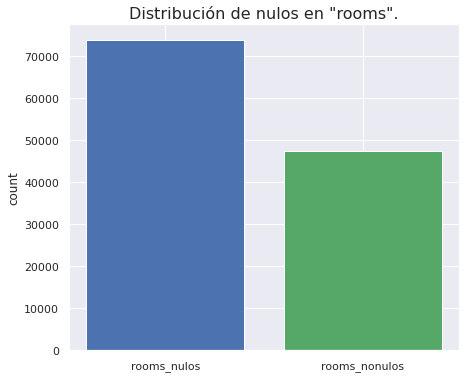

In [122]:
# Graficamos primero la cantidad de nulos y valores cargados.

sns.set()
fig, ax = plt.subplots(figsize = (7,6))
ax.set_ylabel('count')
ax.bar('rooms_nulos', data.rooms.isnull().sum(), color = 'b')
ax.bar('rooms_nonulos', data.rooms.notnull().sum(), color = 'g')
ax.set_title('Distribución de nulos en "rooms".', fontsize = 16)
for bars in ax.containers:
    ax.bar_label(bars)


# Si esta celda devuelve un error reiniciar el entorno y ejecutar nuevamente

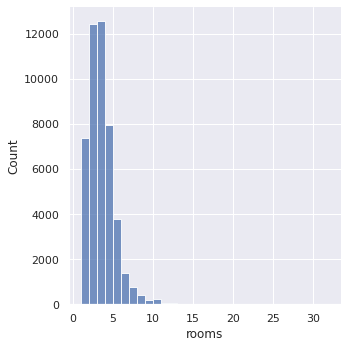

In [124]:
# ploteamos la distribucion de rooms con datos crudos
sns.displot(data, x="rooms", binwidth=1)

In [125]:
# Ahora analizamos cómo es la distribución de los valores de rooms por 'property_type':

rooms_categories = pd.cut(data.rooms, bins = 6)
data.pivot_table(values='rooms', index='property_type', columns=rooms_categories, aggfunc='count', fill_value = 0)

rooms,"(0.969, 6.167]","(6.167, 11.333]","(11.333, 16.5]","(16.5, 21.667]","(21.667, 26.833]","(26.833, 32.0]"
property_type,,,,,,
PH,3200,44,2,1,0,0
apartment,30909,325,22,7,3,2
house,11295,1282,138,34,12,9
store,95,10,0,0,0,0


In [126]:
# Evaluamos samples de departamentos con más de 15 ambientes para ver si puede haber datos mal cargados:

data[(data.rooms >= 15) & (data.property_type == 'apartment')][['surface_total_in_m2','surface_covered_in_m2','rooms', 'description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,rooms,description
876,NaN,382.0,17.0,"Corredor Responsable: Mario Gabriel Gerez - CUCICBA 6477Contacto: Juan Salvador Córdova - MLS ID # 371159-11Se Venden, solos o en bloque dos semipisos en Frente del Centro Cultural San Martin. El inmueble funciona actualmente como hotel familiar. Y se entrega libre de ocupantes, a menos que se especifique lo contrario. La renta actual es de aproximadamente $ 50.000 por mes. Las dos unidades funcionales que son el 1er y 2do piso se describen a continuacion Primer piso 203 metros totales 143 metros cubiertos 21 semicubiertos 22 descubiertos 3 metros de balcon 12 metros superficie superpuesta interior Segundo piso 179 totales 143 metros cubiertos 21 semicubiertos 12 de superpuesto 2 metros de balcon Preguntar por la opción de comprar el edificio entero. Como por la compra de algún piso en particular. Martillero y Corredor Público Mario G. Gerez MPCSI 6012 / CUCICBA 6477 Av. Del Libertador 618 Vicente Lopez, 1642 Vicente Lopez, Argentina"
45552,NaN,NaN,32.0,"Corredor Responsable: Real Estate New Generation S.A. - C.C.P.I.M 0001- S.A.- 2011Contacto: Guillermo Monetti - MLS ID # 420271015-365Espectacular ubicación a metros de la plaza departamental, complejo de 8 departamentos con 2 locales comerciales, el mismo está en proceso de construcción al 50% de avance de obra. El complejo dispone de 8 cocheras grandes, 2 locales comerciales al frente de 35 m2 aproximados con baño propio. 2 departamentos en Planta baja de 70 m2 cada uno, con living comedor amplio, cocina / lavandería, 2 habitaciones, baño completo y patio. 6 departamentos en Primer Piso de 70 m2 cada uno, con living comedor amplio, cocina / lavandería, 2 habitaciones y baño completo Posibilidad de ampliar el complejo a 2 departamentos extras. Se reciben departamentos terminados en el mismo complejo como parte de pago."
111319,NaN,359.0,17.0,"Corredor Responsable: Mauro Marvisi - CUCICBA 1762Contacto: Ana Speier - MLS ID # 420051219-14Departamento de categoría con detalles de lujo en la mejor zona de recoleta. Muy luminoso y con vista abierta, cuenta con 2 vestidores, bar, varios dormitorios y baños completos. Posee habitación separada de chauffeur en otro piso del edificio y dos dormitorios de servicios con baño completo en una zona separada. Se ingresa por el palier privado a una galería que da acceso al living: Pisos de roble de Eslovenia, Chimenea de Mármol Carrara y verde Alpes. A la derecha se encuentra una biblioteca con su chimenea de Mármol de Alabastro y por una puerta oculta se accede a un estar con bar. Este sector tiene un comedor, una bodega y toilette. Hay dos dormitorios y un baño. Luego: una amplia cocina y un sector de servicio, con lavadero, baño y dos dormitorios de servicio. En un sector separado se encuentre el dormitorio principal con dos vestidores y baño en suite. En este sector hay un baño completo, y un cuarto de huéspedes en suite con terraza."
114702,NaN,NaN,21.0,DEPTO AMPLIO SOBRE Bv MARCELO T DE ALVEAR A POCAS CUADRAS DE LA TERMINAL DE OMNIBUS. SIN EXPENSAS176 M2 CUBIERTOS COMPUESTO POR: COCINA - COMEDOR AMPLIO 3 DORMITORIOS ANTE BAÑO Y BAÑO AMPLIO 2° BAÑO DE SERVICIO LIVING AMPLIO CON BALCON PATIO ASADOR COCHERA PARA DOS VEHICULO LAVADERO 2° COCINA DE SERVICIO SALA DE ESCRITORIO PATIO DE LUZ TERRAZA - EXCELENTE ESTADO DE CONSERVACION - MATERIAL DE PRIMERA CALIDAD.- PROYECTO DE AMPLIACION.- TODOS LOS SERVICIOS AL DIA - LISTO PARA ESCRITURAR. TU CONSULTA NO MOLESTA!! CONTACTOS AL 0353 / 4960402 Email:
46424,55.0,55.0,22.0,"Complejo Lagunas: incomparable y alucinante vista central y a eje de la laguna desde todos los ambientes, 70 mts. de jardín propio (privado) y con salida directa a la laguna, playa de arena y parque, con posibilidad de práctica de navegación a vela o remo.Impecable dormie tipo casa de casi 55 m2 sup. cub. :..!! hall de acceso, living-comedor, cocina separada y con barra/desayunador ...dormitorio en suite, amplio vestidor doble placard, galería de 1

In [127]:
# Observamos que aquellos departamentos con > 20 ambientes en verdad se tratan de complejos completos. Eliminaremos estos registros (que son pocos)
# ya que pueden complicar el modelo luego para property_type == 'apartment'.

indexes_to_drop = data[(data.rooms > 20) & (data.property_type == 'apartment')].index
data = data.drop(indexes_to_drop)

In [128]:
# Evaluamos ahora las property type == 'house' con más de 20 ambientes:

data[(data.rooms >= 20) & (data.property_type == 'house')][['surface_total_in_m2','surface_covered_in_m2','rooms', 'description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,rooms,description
40104,NaN,217.0,30.0,"Corredor Responsable: Carlos Borra - CPCPI 4900Contacto: Ary Moreno - MLS ID # 420701045-23VENTA COMPLEJO CABAÑAS APTO CRÉDITO CON CERTIFICADO DE APROBACIÓN DE REGISTRO EN SECRETARIA DE TURISMO DE CÓRDOBA. COMPLEJO EL SAUCE. EL COMPLEJO COMPRENDE 4 CABAÑAS TOTALMENTE EQUIPADAS, 2 PARA 4 PERSONAS Y 2 PARA 6 PERSONAS. EXCELENTE CALIDAD CONSTRUCTIVA, PAREDES DE LADRILLO VISTO JUNTA AL RAS, TECHOS DE MADERA Y TEJAS CERÁMICAS. VISTA PANORÁMICA A LAS SIERRAS GRANDES. LAS CABAÑAS POSEEN TODAS EL MISMO EQUIPAMIENTO: COCHERA CUBIERTA, INDIVIDUALES E INGRESOS INDEPENDIENTES. GALERÍA CON ASADOR COCINA-COMEDOR 2 DORMITARIOS LAS DE 6 PERS.(1 CAMA MATRIMONIAL Y 2 CUCHETAS) 1 DORM LAS DE 4 PERS.(CON CAMA MARINERA EN EL COMEDOR) CALEFACTOR CALEFON COCINA HELADERA MESA SILLAS BANCOS PARA GALERÍA VAJILLA Y UTENSILIOS DE COCINA , PLATOS, SARTENES, BANDEJAS, TASAS, OLLAS, PAVA,ETC (COCINA TOTALMENTE EQUIPADA) ROPEROS, SABANAS, FRAZADAS, ALMOHADAS, COLCHONES, ETC VENTILADORES CORTINAS BAÑOS(ESPEJO, CORTINAS EN DUCHA,ETC) TUBOS DE GAS ENVASADO JUEGOS INFANTILES ÁREA DE ESPARCIMIENTO"
115178,NaN,365.0,20.0,"""LA HUERTA""A LA VENTA LISTO PARA COMENZARA FUNCIONAR: RESTAURANT, DESPENSA, DEPARTAMENTO, CASA, PARQUETotal Mts.Cub.: 365 mts. Total Mts. Sem.: 75 mts. Total Mts. Vereda: 184 mts. ""UNA HECTAREA"" UBICACIÓN: ESTRATÉGICA, s/Ruta Prov.N°5, Villa General Belgrano.DESCRIPCIÓN: BLOQUE 1: RESTAURANT, DESPENSA, PATIO CERVECERO + DEPARTAMENTO + SÓTANO + PLANTA PURIFICADORA MTS. CUB: 197.9 mts. SEMI.: 35 mts. Vereda: 126 mts. Deck: 23 a) Restaurant, Despensa (101 mts. 2), y Patio Cervecero (57 mts.): dos baños, cocina dividida en sección elaboración y sección lavado con todo el equipamiento de categoría, (anafe industrial 5 hornallas, horno, horno pizzero, carlitera, freidora, extractor, campana con motor, heladera hecha a medida con cajones divisorios y mesada de acero inoxidable, repisas en todo el perímetro, escurridor de platos industrial, isla, 4 bachas de lavado con amplias mesadas, vajilla, mantelería, cortinas, utensilios, mesas y sillas. TODO NUEVO A ESTRENAR. El Restaurant con la despensa, se destacan por sus aberturas, tanto su puerta principal, como ventanales con vista panorámica a las Sierras Grandes, Sierras Chicas, y parque del lugar, dan calidez y encanto. Todas ellas tienen postigones de madera, y portón corredizo. Los techos de madera se destacan por su altura y arquitectura. La despensa cuenta con heladera exhibidora, repisa artesanal hecha a medida, balanza digital, cortadora de fiambres, barra divisora. El Restaurant cuenta con una puerta ventana que se comunica con una terraza (patio cervecero) con imponente vista, desde el cual puede verse ""La Huerta"", y la escultura ""caballo de chatarra"" (logos del Restaurant, los cuales se observan en La Veleta) frutales, pinares, arboleda añeja, enmarcado su fondo por las Sierras Grandes. Su parque de una hectárea invita a caminarlo, y observar su vegetación, llegar hasta La Huerta, donde se cosechan las especies y vegetales, que se sirven en la mesa. Tanto en el frente del Restaurant, como en sus laterales se encuentra apto para poner mesas. Su puerta de ingreso es de hierro, con vitro.b) Departamento en Planta Alta. Arriba del Restaurant en su lateral derecho, subiendo una escalera de madera, llegamos a una terraza (deck), con vista panorámica, donde por una puerta ventana se accede a un Departamento, que se caracteriza por su funcionalidad. En el primer piso hay una pequeña cocina comedor, c/ cocina c/ horno, mesada y bacha, heladera, sillones bauleros con almohadones, mesa y sillas, 1 baño. En el segundo piso por el cual se accede por una escalera caracol de hierro y madera, 1 habitación matrimonial, ventanal con imponente vista. Muebles a medida. Tv. Mesas de Luz, velador. Mts. cub: 37 mts. 2 (aprox.)c) Sótano: 20 mts. 2 (aprox.)d) Planta Purificadora: de tres piletones, 3 mts.2 BLOQUE DOS: CASA c/ ALTI

In [129]:
# En este caso encontramos que los valores de la cantidad de ambientes no se encuentran descriptos en la descripción y parecen ser incoherentes.
# Imputaremos estos valores como np.NaN

data.loc[(data.rooms >= 20) & (data.property_type == 'house'), 'rooms'] = np.NaN

In [130]:
# Vemos nuevamente la tabla pivot luego de las transformaciones, cambiamos el número de bins ya que se redujo la cantidad de ambientes máxima.

rooms_categories = pd.cut(data.rooms, bins = 4)
data.pivot_table(values='rooms', index='property_type', columns=rooms_categories, aggfunc='count', fill_value = 0)

rooms,"(0.981, 5.75]","(5.75, 10.5]","(10.5, 15.25]","(15.25, 20.0]"
property_type,,,,
PH,3131,112,3,1
apartment,30579,646,31,6
house,10293,2222,189,33
store,93,12,0,0


In [131]:
# Usamos regex para encontrar los ambientes de cada propiedad, luego de ese resultado sacamos solo los numeros a otra columna para luego pasarlos a enteros
patron = r'\d+\s(amb[ientes])'
regex = re.compile(patron, flags = re.IGNORECASE)

data["ambientes"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)
data.ambientes.value_counts()

3 ambi        6608
2 ambi        6504
2 AMBI        3690
4 ambi        3674
3 AMBI        3368
              ... 
004 Ambi         1
652 Ambi         1
11 AMBI          1
20192 ambi       1
102 AMBI         1
Name: ambientes, Length: 131, dtype: int64

In [132]:
# Extraemos los números y los convertimos a enteros en una nueva columna
data["ambientes2"] = data.ambientes.apply(lambda x: x if x is np.nan else int(re.findall(r'\d+', x)[0]))
data.ambientes2.value_counts()

2.0        10982
3.0        10544
4.0         6050
1.0         2422
5.0         1698
           ...  
172.0          1
28612.0        1
547.0          1
693.0          1
102.0          1
Name: ambientes2, Length: 69, dtype: int64

In [133]:
# Registros con información de número de ambientes en su descripción
print(f'La cantidad de registros con información de número de ambientes en su descripción es: {data.ambientes2.notnull().sum()}')

La cantidad de registros con información de número de ambientes en su descripción es: 32554


In [134]:
# filas donde la columna rooms sea nula y se haya encontrado ambientes en la description
rooms_null_con_descrip = data[(data.rooms.isnull()) & (data.ambientes2 > 0)]
rooms_null_con_descrip[['rooms','ambientes','ambientes2']]

,rooms,ambientes,ambientes2
0,NaN,2 AMBI,2.0
2,NaN,2 AMBI,2.0
3,NaN,3 ambi,3.0
11,NaN,1 ambi,1.0
12,NaN,2 AMBI,2.0
...,...,...,...
121120,NaN,2 ambi,2.0
121124,NaN,3 ambi,3.0
121131,NaN,4 ambi,4.0
121138,NaN,2 AMBI,2.0


In [135]:
# Observamos que en muchos de los Regex se encontraron valores excesivamente altos para 'ambientes', revisaremos ejecutando samples.
data[data.ambientes2 >= 20][['rooms', 'description']].sample(5)

,rooms,description
32357,3.0,"Corredor Responsable: Jorge Salafia - CUCICBA 5666Contacto: Paola Rodríguez - MLS ID # 420211162-653 Ambientes Primer Piso x Escalera Bajas Expensas $600 al 9/5/17 Contrafrente 2 Habitaciones con Piso de Madera y Cocina a gas y con Calefon Balcon Calefaccion en el living a gas y electrica en las habitaciones Cerca de la Gral Paz, facil acceso. Varios supermercados cercanos No tiene Cochera pero es facil estacionar en la cuadra Apto Credito Metros Cubiertos 56.27 mts Semicubiertos 3 mts Total 59.27 mts"
25662,1.0,"DEPARTAMENTOS PRE-VENTA DE POZO PARA 2017FINANCIADOS EN PESOSULTIMOS DISPONIBLES Studio 25 m2 con un anticipo de $335.300 y 48 cuotas de $7.9502 ambientes amplio con un anticipo de $721.350 y 48 cuotas de $17.175ANTICIPO FINANCIADO HASTA 12 CUOTAS.TODO EN PESOSSIN REQUISITOSEdificio de 4 pisosParking para bicicletas, puertas blindadas, caja de seguridad, cerraduras electrnicas, UF c/parrilla, portero visor, circuito interno TV, interiores placard, energa solar luz pasillos, parrilla general, laundry, terraza parquizada, aire acondicionado individual, SUM, solarium, jacuzzi, canchita de basquet, laundryConsltenosTe: 15 Mail: departamentos. / fede. .Publicado por edificios financiados a traves INMOMAP"
118724,3.0,"Corredor Responsable: Luis Roman Garcia - C.U.C.I.C.B.A 4040Contacto: Javier Goldestein - MLS ID # 420111126-23 Ambientes APTO CREDITO, con seguridad 24hrs. y grupo electrogeno en edificio. Cocina con lavadero, amplio comedor, dos dormitorios con placares integrados, baños comodo."
25672,1.0,"C5- FINANCIACION PROPIA EN 36 Y 48 CUOTAS EN PESOSDEPARTAMENTOS PRE-VENTA DE POZO PARA 2017FINANCIADOS EN PESOSULTIMOS DISPONIBLES Studio 25 m2 con un anticipo de $335.300 y 48 cuotas de $7.9502 ambientes amplio con un anticipo de $721.350 y 48 cuotas de $17.175ANTICIPO FINANCIADO HASTA 12 CUOTAS.TODO EN PESOSSIN REQUISITOSEdificio de 4 pisosParking para bicicletas, puertas blindadas, caja de seguridad, cerraduras electrnicas, UF c/parrilla, portero visor, circuito interno TV, interiores placard, energa solar luz pasillos, parrilla general, laundry, terraza parquizada, aire acondicionado individual, SUM, solarium, jacuzzi, canchita de basquet, laundryConsltenosTe: 15 Mail: departamentos. / fede. .Publicado por edificios financiados a traves INMOMAP"
47829,2.0,Corredor Responsable: Mariano Aufseher - CUCICBA 4251Contacto: Rodrigo Marzialetti - MLS ID # 420251082-172 Ambientes en 52m2 en el límite Devoto - Monte Castro en un edificio con 6 años de antigüedad. -Cocina Integrada en Perfectas condiciones -Orientación Sur -Muy luminoso -Instalaciones en perfecto estado -Balcón Corrido -Cochera Cubierta -Cochera Descubierta - Expensas a Junio del 2017: $1700 ¡Espero tu llamado para coordinar una visita!


In [136]:
# Se observa que se está mezclando número de ID o número de departamento (dentro de la descripción) con el número de ambientes. Procederemos a imputar
# estos valores como np.NaN en la columna "ambientes2" (auxiliar) para no agregar información errónea al dataset.

data.loc[data.ambientes2 >= 20, 'ambientes2'] = np.NaN

In [137]:
# El número de valores NaN a rellenar entonces es :

(data.ambientes2.notnull() & data.rooms.isnull()).sum()

16381

In [138]:
# Observamos que hay una gran diferencia entre la cantidad de matches que se hicieron y los nulos a rellenar. Evaluaremos ahora si hay diferencias
# entre lo encontrado por Regex en la columna 'description' y en lo que está cargado en la columna 'rooms'.

(data[(data.rooms.notnull()) & (data.ambientes2.notnull())].rooms != data[(data.rooms.notnull()) & (data.ambientes2.notnull())].ambientes2).sum()

2226

In [139]:
# Priorizaremos la información cargada en la descripción ya que suele haber errores en las otras columnas. Además para que sea comparable
# el valor de los NaN que se rellenaron según lo encontrado en su descripción. Hacemos entonces la imputación tanto para NaN como para reemplazar valores.

data.loc[data.ambientes2.notnull(), 'rooms'] = data['ambientes2']

In [140]:
#Una vez que imputamos los datos borramos las columnas auxiliares excedentes 

data.drop(columns=['ambientes','ambientes2'],axis=1,inplace=True)

In [141]:
# Y el número de NaN que quedaron luego de la transformación de los datos resulta:

data.rooms.isnull().sum()

57482

AttributeError: ignored

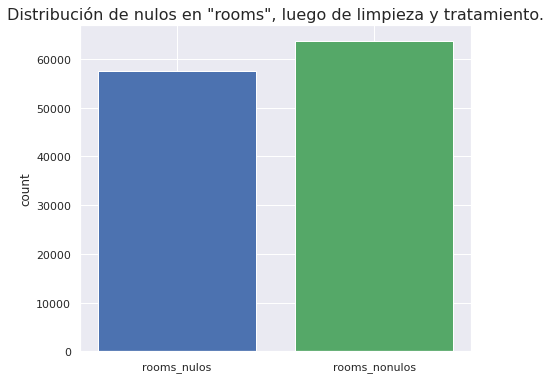

In [142]:
# Lo vemos gráficamente:

# Graficamos primero la cantidad de nulos y valores cargados.

sns.set()
fig, ax = plt.subplots(figsize = (7,6))
ax.set_ylabel('count')
ax.bar('rooms_nulos', data.rooms.isnull().sum(), color = 'b')
ax.bar('rooms_nonulos', data.rooms.notnull().sum(), color = 'g')
ax.set_title('Distribución de nulos en "rooms", luego de limpieza y tratamiento.', fontsize = 16)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# Analizamos con una pivot_table cómo quedó la distribución de 'rooms' luego de esta imputación. Cambia el número de bins por ser distinto el rango.

rooms_categories = pd.cut(data.rooms, bins = 4)
data.pivot_table(values='rooms', index='property_type', columns=rooms_categories, aggfunc='count', fill_value = 0)

In [ ]:
# ploteamos la distribucion de rooms post tranformacion y tratamiento de nulos
sns.displot(data, x="rooms", binwidth=1)

#Análisis y tratamiento de nulos columnas **surface_total_in_m2** y **surface_covered_in_m2**

In [ ]:
# Graficamos primero la cantidad de nulos y valores cargados en ambas columnas.

sns.set()
fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].set_ylabel('count')
ax[0].bar('surface_total_in_m2_nulos', data.surface_total_in_m2.isnull().sum(), color = 'b')
ax[0].bar('surface_total_in_m2_nonulos', data.surface_total_in_m2.notnull().sum(), color = 'g')
ax[0].set_title('Distribución de nulos en "surface_total_in_m2".', fontsize = 16)
#for bars in ax[0].containers:
#    ax[0].bar_label(bars, fontsize = 14)
ax[1].set_ylabel('count')
ax[1].bar('surface_covered_in_m2_nulos', data.surface_covered_in_m2.isnull().sum(), color = 'b')
ax[1].bar('surface_covered_in_m2_nonulos', data.surface_covered_in_m2.notnull().sum(), color = 'g')
ax[1].set_title('Distribución de nulos en "surface_covered_in_m2".', fontsize = 16)
for bars in ax[1].containers:
    ax[1].bar_label(bars, fontsize = 14)
plt.show()

**surface_total_in_m2** antes de limpieza

In [ ]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))

ax[0,0].hist(data[(data.property_type == 'house')]['surface_total_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface total in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_total_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface total in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_total_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface total in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_total_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface total in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

**surface_covered_in_m2** antes de limpieza

In [ ]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))


ax[0,0].hist(data[(data.property_type == 'house')]['surface_covered_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface covered in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_covered_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface covered in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_covered_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface covered in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_covered_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface covered in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

In [143]:
# Ahora analizamos cómo es la distribución de los valores de superficie TOTAL con una pivot table, discriminando por 'property_type'

sup_categories = pd.cut(data.surface_total_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_total_in_m2', index='property_type', columns=sup_categories, aggfunc='count')

surface_total_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,2,4,3565,21,1
apartment,7,135,50537,146,8
house,10,16,18826,5486,53
store,2,75,2125,477,11


In [144]:
# Análogamente hacemos la misma tabla pivot pero para superficie CUBIERTA:

sup_categories = pd.cut(data.surface_covered_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_covered_in_m2', index='property_type', columns=sup_categories, aggfunc='count', fill_value = 0)

surface_covered_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,32,234,4636,11,0
apartment,207,209,59205,105,3
house,174,705,31514,1105,12
store,36,321,2337,447,14


In [145]:
# Buscaremos con REGEX los metros cuadrados totales de las propiedades en su descripción, intentando localizar patterns como:
# 'ubicado en lote de 450 m2', 'superficie total: 300 m2', '450 metros2 total', 'terreno de 30 m' y sus variantes.

patron = r'''(\d*(.|,)\d+\s?(m|metros|mts)+\s*(2|²)?\s?total)|(lote\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)|(terreno\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)|(total\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)'''
regex = re.compile(patron, flags = re.IGNORECASE)
data["superficie"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)
data['superficie'].replace(',', '.', regex=True, inplace=True)
data["superficie2"] = data.superficie.apply(lambda x: x if x is np.nan else float(re.findall(r'[\d]+', x)[0]))
data[data.superficie.notnull()][['superficie','superficie2']]

,superficie,superficie2
6,106 m2 TOTAL,106.0
10,Lote de 1514 m,1514.0
26,lote de 700 m,700.0
40,total: 138 m2,138.0
48,Total 35m2,35.0
...,...,...
121098,94 m2 total,94.0
121102,117 m2 total,117.0
121124,115 m2 total,115.0
121155,lote de 550 m2,550.0


In [146]:
# La cantidad de nulos en esta columna previo a hacer los reemplazos es:
data.surface_total_in_m2.isnull().sum()

39324

In [147]:
# Este es el número de coincidencias con el REGEX definido para superficie total.
# Hemos observado en las descripciones de las propiedades que en muchos casos no coincide la superficie total cargada con la que figura en la descripción.
# No solo vamos a rellenar los valores faltantes, sino que priorizaremos la información extraída de la 'description' por sobre la cargada en la columna surface
# haciendo un reemplazo.

# Analizamos cuantos valores previamente nulos tuvieron match y se hará un "fill":
data[data.superficie2.notnull()].surface_total_in_m2.isnull().sum()

3509

In [148]:
# Analizamos ahora cuántos matches difieren de los valores previamente cargados en la columna 'surface_total_in_m2'.

(data[(data.superficie2.notnull()) & (data.surface_total_in_m2.notnull())].surface_total_in_m2 \
        != data[(data.superficie2.notnull()) & (data.surface_total_in_m2.notnull())].superficie2).sum()

3669

In [149]:
# Encontramos la cantidad de valores que serán reemplazados por valores nuevos y más confiables, según lo visto en muchos samples de las descripciones.
# Hacemos reemplazo:

data.loc[data.superficie2.notnull(), 'surface_total_in_m2'] = data['superficie2']

In [150]:
# Observamos ahora la cantidad de valores NaN que quedaron en la columna SURFACE TOTAL, ya que no estaban cargados y no se encontraron en 'description'.
sup_total_nan_inicial = data.surface_total_in_m2.isnull().sum()
data.surface_total_in_m2.isnull().sum()

35815

In [151]:
# Una vez que imputamos los datos borramos las columnas auxiliares generadas excedentes.

data.drop(columns=['superficie','superficie2'],axis=1,inplace=True)

In [152]:
# Ahora buscaremos información de metros cubiertos (como xx m2 cubiertos, xx metros2 cubiertos, (superficie) cubierta xx m2 y sus variantes).

patron = r'''/(\d+\s?(m|metros|mts)\s*(2|²)?\s?(cubiertos))|(\d*(.|,)\d+\s?(m|metros|mts)+\s*(2|²)?\s?cubiertos)|(cubierta\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)'''
regex = re.compile(patron, flags = re.IGNORECASE)
data["superficie"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)
data['superficie'].replace(',', '.', regex=True, inplace=True)
data["superficie2"] = data.superficie.apply(lambda x: x if x is np.nan else float(re.findall(r'[\d]+', x)[0]))
data[data.superficie.notnull()][['superficie','superficie2']]

,superficie,superficie2
6,78 m2 CUBIERTOS,78.0
37,75 m cubiertos,75.0
40,cubierta: 74 m2,74.0
48,cubierta: 15m2,15.0
83,cubierta: 55 m2,55.0
...,...,...
121065,100 m2 cubiertos,100.0
121097,220 m2 cubiertos,220.0
121132,CUBIERTA: 40M²,40.0
121155,.130 m2 cubiertos,130.0


In [153]:
# La idea es utilizar los valores de la columna generada 'superficie2' para imputar superficies cubiertas nulas y mal cargadas. Hay muchos registros con
# valores de superficie cargados que difieren a la descripción (o que son excesivamente grandes) y priorizaremos los que figuran en la columna 'description'.
# Mostramos algunos ejemplos de registros mal cargados:

mask_surface_10000 = data.surface_covered_in_m2 > 10000
mask_house_or_department = (data.property_type == 'house') | (data.property_type == 'apartment')
data[mask_house_or_department & mask_surface_10000][['property_type','surface_total_in_m2', 'surface_covered_in_m2', 'description']].sample(3)

,property_type,surface_total_in_m2,surface_covered_in_m2,description
110110,house,NaN,20383.0,"Corredor Responsable: Maximiliano Vazquez - C.M.C.P.S.I 5119Contacto: Cristian Alvarez - MLS ID # 420101234-2Casa en dos plantas ideal dos familia o como inversión. Son dos P.H. con entrada independiente, se vende en conjunto. Planta baja: 2 dormitorios. Cocina comedor. Sala de estar. Living. 2 habitaciones. 2 baños. Cuarto de guardado. Jardín con parrilla. Cochera. Planta alta: 3 dormitorios. Living comedor. cocina. 1 baño completo. Lavadero. Altillo. Terraza. Balcón. Martillero y Corredor Responsable: Rebeca Stern CUCICBA 4824 / Maximiliano Vazquez CSI 5119"
119935,house,NaN,12731.0,"Corredor Responsable: Matiaz Ruiz Moreno - CPCPI 4740Contacto: Cecilia Manzano - MLS ID # 420581067-17Esta casa se encuentra a 300m de ruta 38 y a 400m del centro,en un area residencial muy tranquila. Con gas natural. Tiene una cocina comedor,living dispuestos en un gran ambiente. 5 dormitorios,2 baños ,patio interno,lavadero grande con otro baño,entrada para auto techada,rejas en el frente. Queres conocerla? LLAMAME Y VAMOS!!!!!"
76012,apartment,NaN,187000.0,"Barrio Norte EXCELENTE Semipiso al Frente Balcón Corrido Superficie 187 metros todos los Ambientes Muy Luminosos y Soleados - Palier privado. 4 dormitorios - c/dependencia servicio - 4 bañosRecepción y Comedor,Cocina con Comedor Diario y Lavadero Cochera Fija y gran Baulera Sercios Centrales Edificio con Entrada de Cortesía Expensas Incluye Aysa y Vigilancia $11.000.-"


In [154]:
# La cantidad de nulos en esta columna previo a hacer los reemplazos es:
sup_cub_nan_inicial = data.surface_covered_in_m2.isnull().sum()
data.surface_covered_in_m2.isnull().sum()

19905

In [155]:
# De los matches encontrados para superficie cubierta, evaluamos cuántos se utilizarán para rellenar NaN y cuántos para sobreescribir valores.

# Analizamos cuantos valores previamente nulos tuvieron match y se hará un "fill":
data[data.superficie2.notnull()].surface_covered_in_m2.isnull().sum()

812

In [156]:
# Analizamos ahora cuántos matches difieren de los valores previamente cargados en la columna 'surface_covered_in_m2'.

(data[(data.superficie2.notnull()) & (data.surface_covered_in_m2.notnull())].surface_covered_in_m2 \
        != data[(data.superficie2.notnull()) & (data.surface_covered_in_m2.notnull())].superficie2).sum()

1956

In [157]:
# Encontramos la cantidad de valores que serán reemplazados por valores nuevos y más confiables, según lo visto en muchos samples de las descripciones.
# Hacemos reemplazo:

data.loc[data.superficie2.notnull(), 'surface_covered_in_m2'] = data['superficie2']

In [158]:
# Observamos ahora la cantidad de valores NaN que quedaron en la columna SURFACE TOTAL, ya que no estaban cargados y no se encontraron en 'description'.

data.surface_covered_in_m2.isnull().sum()

19093

In [159]:
# Una vez que imputamos los datos borramos las columnas auxiliares generadas excedentes.

data.drop(columns=['superficie','superficie2'],axis=1,inplace=True)

In [160]:
# Ya completados y corregidos los valores de surface_total y surface_covered utilizando REGEX, continuaremos tratando estas columnas
# evaluando aquellas columnas que tienen uno de los dos datos cargados y el otro NaN, y también contemplando tipo de propiedad.
# Evaluamos primerro cuántos registros no tienen surface_total cargada pero sí surface_covered, por tipo de propiedad:

data[data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()].groupby('property_type')\
        .agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,1431,0
apartment,13176,0
house,9422,0
store,840,0


In [161]:
# Utilizaremos nuevamente REGEX para buscar las palabras "plantas" (ejemplo '2 plantas'), "patio" y "parque". Para los casos que NO haya match,
# emplearemos el valor de surface covered para completar el NaN en surface total, asumiendo que las propiedades no cuentan con exterior ni más de 1 planta.

patron_exterior = "(parque|patio|plantas)"
patron_exterior_regex = re.compile(patron, flags = re.IGNORECASE)
matches_exterior = data.description.apply(lambda x: np.NaN if x is np.NaN else patron_exterior_regex.search(x))
mask_sin_exterior = matches_exterior.isnull()

mask_total_null_cub_notnull = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()

# La cantidad de propiedades que tienen cargada surfacce covered, no tienen surface total y no se encontró evidencias de
# múltiples plantas o exterior en su descripción son:

(mask_sin_exterior & mask_total_null_cub_notnull).sum()

23240

In [162]:
# Procedemos entonces a hacer la imputación de la columna 'surface_total_in_m2' en estos registros:

data.loc[mask_total_null_cub_notnull & mask_sin_exterior,['surface_total_in_m2']] = data[mask_total_null_cub_notnull & mask_sin_exterior]['surface_covered_in_m2']

In [163]:
# filtramos los registros que no son casa, ya que consideramos que las casas suelen tener mayor superficie total que cubierta
mask_house = data.property_type != 'house'
mask_cubierta_total_null = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()
data[mask_cubierta_total_null & mask_house].groupby('property_type').agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,109,0
apartment,591,0
store,79,0


In [164]:
print(f'Antes de modificar las filas encontrabamos {data.surface_total_in_m2.isnull().sum()} nulos en superficie total')

Antes de modificar las filas encontrabamos 12575 nulos en superficie total


In [165]:
# rellenamos las filas que cumplen con la condicion en la columna surface total con lo que encontramos con la misma condicion en surface cubierta. Lo hacemos solo para los 'apartment'
# ya que PH y store puede ser grosero hacer esta imputación.

data.loc[(mask_cubierta_total_null) & (data.property_type == 'apartment'),['surface_total_in_m2']] = data[(mask_cubierta_total_null) & (data.property_type == 'apartment')]['surface_covered_in_m2']

In [166]:
print(f'Luego tenemos {data.surface_total_in_m2.isnull().sum()} nulos')

Luego tenemos 11984 nulos


In [167]:
# comprobamos 
data[mask_cubierta_total_null].groupby('property_type').agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,109,0
apartment,591,591
house,850,0
store,79,0


In [168]:
# Evaluamos ahora cuántos registros tienen NaN en surface_covered pero tienen cargado surface_total:

data[data.surface_total_in_m2.notnull() & data.surface_covered_in_m2.isnull()].groupby('property_type')\
        .agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,0,248
apartment,0,5105
house,0,2300
store,0,494


In [169]:
# Análogamente el caso anterior, para todos los casos que no encontremos información de exterior o múltiples plantas, imputaremos el valor faltante
# con la otra columna. 

mask_cub_null_total_notnull = data.surface_total_in_m2.notnull() & data.surface_covered_in_m2.isnull()

# La cantidad de propiedades que tienen cargada surfacce covered, no tienen surface total y no se encontró evidencias de exterior
# o múltiples plantas en su descripción son:

(mask_sin_exterior & mask_cub_null_total_notnull).sum()

8147

In [170]:
# Procedemos entonces a hacer la imputación de la columna 'surface_covered_in_m2' en estos registros:

data.loc[mask_cub_null_total_notnull & mask_sin_exterior,['surface_covered_in_m2']] = data[mask_cub_null_total_notnull & mask_sin_exterior]['surface_total_in_m2']

In [171]:
# Analizamos ahora valores muy grandes o muy pequeños en estas columnas y evaluaremos si los transformamos en nulos.
# Lo haremos utilizando la función .cut y .pivot_table:

sup_categories = pd.cut(data.surface_total_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_total_in_m2', index='property_type', columns=sup_categories, aggfunc='count')

surface_total_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,43,186,4814,26,1
apartment,216,226,63885,458,10
house,438,719,26280,7908,57
store,48,304,2663,577,10


In [172]:
# Asumimos que las propiedades de <= 10 m2 de superficie total son datos cargados erróneamente (corresponde a una propiedad de poco más de 3m x 3m).
# Transformaremos esos valores en NaN por ser considerados no válidos. Lo mismo haremos con las propiedades que ocupen más de una manzana completa y NO
# sean tipo 'store', ya que hemos visto que hay 'stores' como depositos o fábricas que corresponden a varias hectareas de terreno.

data.loc[data.surface_total_in_m2 <= 10, 'surface_total_in_m2'] = np.NaN
data.loc[(data.surface_total_in_m2 >= 10000) & (data.property_type != 'store'), 'surface_total_in_m2'] = np.NaN

In [173]:
# El mismo análisis hacemos para superficie cubierta con valores erróneos:
sup_categories = pd.cut(data.surface_covered_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_covered_in_m2', index='property_type', columns=sup_categories, aggfunc='count', fill_value = 0)

surface_covered_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,38,217,4904,19,1
apartment,235,253,64120,181,5
house,358,724,33475,1675,20
store,61,320,2777,514,9


In [174]:
# La única diferencia es que dejaremos aquellas casas y PH de > 10000 m2 ya que pueden tratarse de propiedades de más de una planta:

data.loc[data.surface_covered_in_m2 <= 10, 'surface_covered_in_m2'] = np.NaN
data.loc[(data.surface_covered_in_m2 >= 10000) & (data.property_type == 'apartment'), 'surface_covered_in_m2'] = np.NaN

In [175]:
# Finalmente, la cantidad porcentual de NaN que quedaron en la columna 'surface_total_in_m2' es:
round(data.surface_total_in_m2.isnull().sum() *100 / data.shape[0],1)

10.9

In [176]:
# Respecto al porcentaje inicial de :
round(sup_total_nan_inicial * 100 / data.shape[0],1)

29.5

In [177]:
# Análogamente, para la superficie cubierta el remanente de datos nulos porcentualmente es:
round(data.surface_covered_in_m2.isnull().sum() *100 / data.shape[0],1)

9.9

In [178]:
# Respecto al porcentaje inicial de:
round(sup_cub_nan_inicial * 100 / data.shape[0],1)

16.4

In [179]:
# Analizamos rápidamente las propiedades de mayor superficie para tipo 'store' y 'PH'.

In [180]:
aux_indexes = list(data[data.property_type == 'PH'].surface_covered_in_m2.nlargest(3).index)

In [181]:
data.loc[pd.Index(aux_indexes),:]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,tipo_de_cambio,provincia,ciudad_partido,barrio
39810,PH,Plottier,|Argentina|Neuquén|Plottier|,Neuquén,3840885.0,-38.959451,-68.058992,200000.0,USD,3528900.0,200000.0,NaN,14742.0,13.566680,NaN,NaN,NaN,NaN,"Venta de Nuevo proyecto urbanístico ""LOTEO LOS ALAMOS"" A pocos metros de la ruta nacional N° 22 el terreno cuenta con 14.742 m2 de superficie, con planos aprobados para realizar un loteo que dispone de extensos 26 lotes de 16 metros de frente con 25 metros de fondo para desarrollos habitacionales distribuidos en sectores con una calle interna que conecta todo los lotes hacia una sola entrada, dando tranquilidad y disposición de barrio abierto con aspecto de barrio cerrado. El loteo se encuentra a solo 7km de la ciudad y a pocos metros del acceso a la circunvalación, que con la ruta nueva conectan al parque industrial de la ciudad de Neuquen en pocos minutos. el desarrollo se vende en bloque completo, siendo esta una excelente oportunidad de inversion por consultas y/o visitas Cel:2994624535 - - YJ SOLUCIONES INMOBILIARIAS",PH EN VENTA,17.6445,Neuquén,Plottier,NaN
39382,PH,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Buenos Aires Costa Atlántica,3429971.0,-37.132977,-56.876654,40000.0,USD,705780.0,40000.0,9435.0,9435.0,91.954023,NaN,NaN,NaN,NaN,"Venta de Lote , OSTENDELote unifamiliarmz 430 lote 9435 m2Consultenos¡¡¡ - - TEYCA S.A. INMOBILIARIA",PH EN VENTA,17.6445,Buenos Aires Costa Atlántica,Pinamar,NaN
62259,PH,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza|Ramos Mejía|,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,NaN,93000.0,USD,1640938.5,93000.0,58.0,5889.0,1603.448276,15.792155,NaN,3.0,NaN,Hermoso ph de tres ambientes muy amplio dos habitaciones altillo amplio lavadero amplia y hermosa terraza propia apto credito. - Publicado a traves de VisualGestion -,PH en Venta Ramos Mejia / La Matanza (A154 604),17.6445,Bs.As. G.B.A. Zona Oeste,La Matanza,Ramos Mejía


In [182]:
# Observamos que las dos primeras propiedade son lotes sin construir y que están mal los datos cargados de surface covered. Los pasaremos a np.NaN.

aux_indexes = list(data[data.property_type == 'PH'].surface_covered_in_m2.nlargest(2).index)
data.loc[pd.Index(aux_indexes),'surface_covered_in_m2'] = np.NaN

In [183]:
# Evaluamos también la cantidad de propiedades cuya relación sup total sea menor a los 20 m2 (que sería 4m x 5 m) y que son PH o House, ya que hay normativas sobre el tamaño mínimo de los lotes
# para edificaciones residenciales.

data[(data.surface_total_in_m2 <= 20) & ((data.property_type == 'house')|(data.property_type == 'PH'))].shape[0]

905

In [184]:
# Sampleamos algunas para ver sus descripciones.

data[(data.surface_total_in_m2 <= 20) & ((data.property_type == 'house')|(data.property_type == 'PH'))][['surface_total_in_m2', 'surface_covered_in_m2', 'description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,description
21740,20.0,70.0,"Casa 3 DORMITORIOS en Delta, Tigre. OPORTUNIDAD SOBRE RÍO CAPITÁN AL 500, zona residencial. Casa de tres habitaciones, baño, cocina comedor y guarda herramientas. Muelle propio. Defensa de piedras y casuarinas en la costa. Lote de 20 metros de frente y 3600 m2 de superficie. Muy buen servicio de lanchas colectivas, pasa lancha almacenera todos los días y recolecciòn de residuos tres veces por semana. - - CASTILLA PROPIEDADES"
871,20.0,20.0,"Corredor Responsable: Raul Hector Merlo - CUCICBA 2407Contacto: Claudia Szakiel - MLS ID # 61110-28PH al frente con 2 dormitorios, garage, patio, lavadero e importante terraza propia. Posibilidad de construir 2 pisos más! Medidas por escritura: PB: 57,85m cub. - 16,98m semi-cub. - 15,18m descub. (PB 90,01m). Azotea: 55,04m descub. Total: 145,05m. Apto crédito. Ubicado a 1 cuadra de Av. Chiclana, a 2 cuadras de Av. Brasil, a 2 de Av. Juan de Garay, y a 4 cuadras de Av. Boedo. Transportes Públicos: Colectivos: 4, 6, 23, 28, 32, 75, 97, 101, 115, 128, 133, 134, 143, 165, 188 A 7 cuadras de la Estación de Subte E General Urquiza (Plaza de los Virreyes - Bolivar) y a 8 cuadras de la Estación de Subte H Inclan (Las Heras - Hospitales) Cercanía a Metrobus y Autopista 25 de Mayo. Te invitamos a conocerlo, te podemos ayudar! Martillero: RAÚL HÉCTOR MERLO CUCICBA 2407 / CSI 5438 Todas las propiedades que figuran en mi perfil se encuentran a cargo del profesional matriculado de la oficina, la intermediación y la conclusión de las operaciones serán llevadas exclusivamente por él."
73585,15.0,15.0,"SOBRE CALLE PARRAVICINI Nº211 BARRIO CORIMAYO (BURZACO).LOTE DE 15 m X 30, SUP. DE LOTE 450 m2.COCINA DE 2 m X 3 m.BAÑO CON BAÑERA DE 2 m X 3 m .LIVING 5 m X 7 m.COMEDOR DIARIO DE 4 m X 8 m.HABITACION DE SERVICIO DE 2,5 m X 3 m.HABITACION DE 3,5 m X 4 m.LAVADERO DE 2,5 m X 2.5 m, BAÑO DE SERVICIO DE 3 m X 2 mEN PLANTA ALTA: .DORMOTORIO DE 3 m X 4 m C/AIRE ACONDICIONADO.DORMIOTORIO DE 5 m X 4 m, CON BAÑO EN SUITE DE 2 m X 1 m, ESTAR DE 2 m X 4 mVALOR:U$S170.000TONEGUZZO INMOBILIARIAE.de Burzaco 601 . BurzacoTel: /8855"
77900,15.0,15.0,"UBICADO EN LA CALLE ITALIA Nº1.381 ENTRE BERMUDEZ Y SARMIENTO(BURZACO) CHALET CON TECHO DE TEJALOTE 15m X 18mLIVING DE 3m X 3mCOCINA DE 1,80m X 3mBAÑO DE 1,50m x 2mDORMITORIO DE 3m X 4mDORMITORIO DE 4m X 2mGALERIA DE 3m X 8mPATIO DE 3m X4mGARAGE DE 4m X 5mSERVICIOS LUZ-AGUA-GASESCRITURA Y PLANOS APROBADOSVALOR : U$S120.000TONEGUZZO INMOBILIARIAE.de Burzaco 601 . BurzacoTel: /8855"
116214,20.0,20.0,"Corredor Responsable: Marcos Provvidenti - CCI Sta Fe N 0198Contacto: Juan Pablo Molineris - MLS ID # 420121104-69Se compone de: 2 dormitorios (uno con baño en suite), cocina, living-comedor, baño, patio seco, entrada para 2 vehículos. Nueva construcción, muy poco uso. Posee techo de losa en su totalidad. Todos los servicios Marcos Provvidenti CCI Santa Fe Mat: N º0198"


In [185]:
# Observamos que hay datos mal cargados y otros que fueron extraídos erróneamente por Regex por encontrar, por ejemplo, la primera medida del lote (por ejemplo el ancho en mts).
# Convertimos estos valores en np.NaN ya que son erróneos.

data.loc[(data.surface_total_in_m2 <= 20) & ((data.property_type == 'house')|(data.property_type == 'PH')), 'surface_total_in_m2'] = np.NaN

In [186]:
# Para los departamentos que tengan < 18 m2 de superficie total o cubierta hacemos lo mismo.

data[(data.surface_total_in_m2 < 18) & (data.property_type == 'apartment')].shape[0]

56

In [187]:
data.loc[(data.surface_total_in_m2 < 18) & (data.property_type == 'apartment'), 'surface_total_in_m2'] = np.NaN

In [188]:
data[(data.surface_covered_in_m2 < 18) & (data.property_type == 'apartment')].shape[0]

55

In [189]:
data.loc[(data.surface_covered_in_m2 < 18) & (data.property_type == 'apartment'), 'surface_covered_in_m2'] = np.NaN

In [190]:
# Analizamos rápidamente las propiedades tipo 'house' con muy alta superficie cubierta:

data[(data.property_type == 'house') & (data.surface_covered_in_m2 > 30000)][['surface_covered_in_m2', 'description']]

,surface_covered_in_m2,description
24752,1000450.0,"Son 2 lotes. Cada 2 de 500 metrosTotal 1000450 mts cubiertos aprox.5 Cabañas, cada cabaña tiene 70 metrosSon 2dor, Cocina. Comedor y baño, cochera-El quincho de aproximadamente 80metrosLa pileta. Como se ve esta. Recien revestida. Con luces de led Y cascada. Que filtra el aguaSon 5 cabañas todas de Ladrillo vistoLoza y tejasSistema de camaras de seguridad con monitoreo, alarma, reflectores Led.Tv Smart en todas las cabañas, Directv, parquisados.40 mts de la ruta (Av. Carcano).PRECIO USD $600.000 (MUY BUENA FINANCIACIÓN)Se muestra sin compromiso.Matriculados:Pablo D. ResolaniC.P.C.P.I. 4717Cel. 06Adrian F. SilvestriC.P.C.P.I. 5005Cel. 53"
27856,60270.0,"Increible chalet de gran categoria Lote 8, 66 x 60270 m2 cubiertos + 50 semicubiertosLiving comedor muy amplio toilette de recepcioncocina comedor diario1 dormitorio en suite con vestidor1 suite junior2 dormitorios que comparten otro bao completosalon de estar con vista al jardinAmplio jardin con quincho y parrillaEn PA1 dormitorio bao lavaderoCalefaccion centralTodo muy ventilado y luminoso .Publicado por Maceiro Propiedades a traves INMOMAP"
32012,38247.0,"UBICADO EN COLINAS DE PERALTA RAMOSLote de 10,30 X 38247 mts2 cubiertosDesarrollado en dos plantasModerno, recicladoAcceso automatizado, rejas al frenteLivingComedor diarioBaño con box de duchaAmplia y cómoda cocina comedor con vista al parqueGarage cubierto para dos autos, quincho con parrilla con acceso al parqueTrotadoraEn planta alta:Baño completo3 DormitoriosAmplio dormitorio principal con balcón saliente en suite, vestidor e hidromasajeCalefacción individual por radiadoresLas superficies mencionadas son aproximadas y al solo efectoorientador, los valores pueden ser modificados sin previo avisoCONSULTE SU VALOR"
37807,55500.0,"CASA ESTILO TUDOR DESARROLLADA EN DOS PLANTAS, INGRESO PRINCIPAL A GRAN LIVING COMEDOR CON PISOS DE PINOTEA Y PISOS DAMERO CIELORRASO EN YESO CON MOLDURAS, A CONTINUACION COMEDOR DIARIO CON PISOS DE PINOTEA, HOGAR A LEÑOS Y YESO EN CIELORRASO, SALA DE ESTAR CON HOGAR, CIELORRASO EN MADERA Y PISO CERAMICO COMBINADO CON TIRANTES DE MADERA. UN BAÑO TOILETTE. COCINA CON BARRA DESAYUNADORA, MUEBLES BAJO MESADA Y SOBRE MESADA EN MADERA Y MARMOL, CON VENTNAS DE VIDRIO REPARTIDO CON VISTA AL PARQUE. PATIO JARDIN CON DRIVE IN Y ACCESO A COCHERAS, QUINCHO PARRILLERO CON BAÑO Y ENTREPISO CON HABITACION DE HUESPEDES.PLANTA ALTA: INGRESO POR ESCALERA DE MADERA A ESTAR DISTRIBUIDOR, COMUNICANDO A 4/5 DORMITORIOS, EL PRINCIPAL EN SUITE CON VESTIDOR Y EL BAÑO REVESTIDO EN MARMOL CON JACUZZI.2 BAÑOS MAS PARA EL RESTO DE LOS DORMITORIOS Y SALIDA A GRAN BALCON CON VISTA AL PARQUE. MEDIDAS 12.X 55500MTS2 CUBIERTOS.FRIO CALOR POR CONDUCTOSCASA DE EXCELENTE ESTADO CONSERVACION Y TERMINACION PATIO JARDIN CON DRIVE INMatriculado:Victor Hugo AlagnaCEIR 886Tel. 840 // 4262557 // 4268725"
39221,38240.0,"Terreno de 20mts frente x 60mts fondo, Total 1200 m2 con frentes a calle principal y al Canal. Lote subdivididle, quedando lote 1 de 490m2 a calle principal y lote 2 de 710m2 al Canal con Amarra propia de 18mts de largo (eslora) Superficie Cubierta: 382.40m2, Superficie Semi Cubierta: 99.71m2. Superficie aprobada sin construir 12.80m2 (en lote 1, hoy es la cochera cubierta)Superficie Total 494.91 m2PB: hall de recepciÃ³n, Comedor, Living, Sala de Estar todo a patio interno cerrado conformando un ambiente abierto muy grande. Lleno de Luz. Dormitorio de huÃ©spedes o Escritorio. Toilette. Cocina Completa. Dependencia de servicio con su baÃ±o. Sala de mÃ¡quinas. Quincho cubierto con bacha y muebles de guardado, incorporado al patio interno cerrado con ventanales al JardÃ­n.PA: Hall de distribuciÃ³n o Family. 2 dormitorios en Semi Suite con baÃ±o compartimentado. Suite Jr., Master Suite de 6x4 con vestidor, baÃ±o compartimentado y BalcÃ³n Terraza hacia el Canal vista Abierta. Exterior: Parque con Pileta de 12 x 3.50. Amarra de 18mts largo (eslora). Entrada al frente de a casa pa

In [191]:
# Encontramos que los datos están mal cargados en la descripcción así que los imputaremos como nulos:

data.loc[(data.property_type == 'house') & (data.surface_covered_in_m2 > 30000), 'surface_covered_in_m2'] = np.NaN

AttributeError: ignored

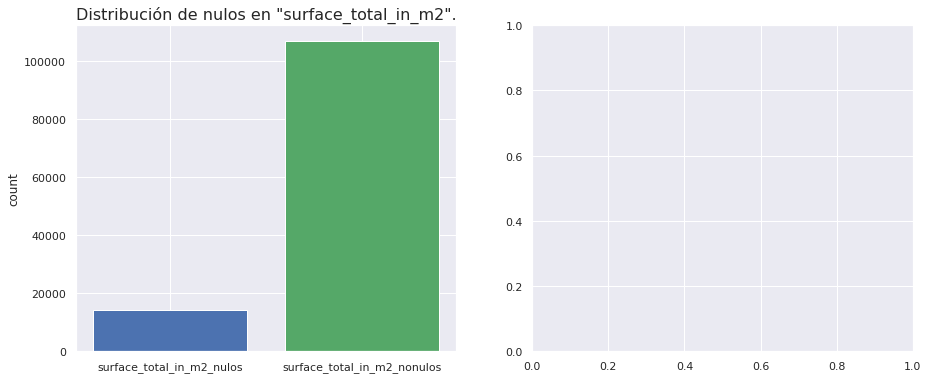

In [192]:
# Vemos entonces nuevamente el gráfico hecho al principio de esta sección, pero luego del tratamiento de datos:

sns.set()
fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].set_ylabel('count')
ax[0].bar('surface_total_in_m2_nulos', data.surface_total_in_m2.isnull().sum(), color = 'b')
ax[0].bar('surface_total_in_m2_nonulos', data.surface_total_in_m2.notnull().sum(), color = 'g')
ax[0].set_title('Distribución de nulos en "surface_total_in_m2".', fontsize = 16)
for bars in ax[0].containers:
    ax[0].bar_label(bars)
ax[1].set_ylabel('count')
ax[1].bar('surface_covered_in_m2_nulos', data.surface_covered_in_m2.isnull().sum(), color = 'b')
ax[1].bar('surface_covered_in_m2_nonulos', data.surface_covered_in_m2.notnull().sum(), color = 'g')
ax[1].set_title('Distribución de nulos en "surface_covered_in_m2".', fontsize = 16)
for bars in ax[1].containers:
    ax[1].bar_label(bars)
plt.show()

**surface_total_in_m2** despues de limpieza

In [ ]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))

ax[0,0].hist(data[(data.property_type == 'house')]['surface_total_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface total in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_total_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface total in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_total_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface total in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_total_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface total in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

**surface_covered_in_m2** despues de limpieza

In [ ]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))


ax[0,0].hist(data[(data.property_type == 'house')]['surface_covered_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface covered in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
plt.ticklabel_format(style='plain')
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_covered_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface covered in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_covered_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface covered in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_covered_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface covered in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

In [ ]:
# Graficamos un scatterplot luego del tratamiento las columnas de surface y rooms para intentar identificar valores atípicos.

fig = plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.scatterplot(data=data, x="surface_covered_in_m2", y="rooms", hue = 'property_type')
plt.xlabel("Surface covered [m2]"); plt.ylabel("Rooms");plt.title("Relación entre Rooms y Surface Covered.")
plt.show()

In [ ]:
# Se observa que hay propiedades com poca superficie y muy alto número de Rooms. Estos valores deberían analizarse y posiblemente imputarse como np.NaN. Se realizará en caso de disponer con el tiempo.

#Análisis y tratamiento de nulos columnas **Precio**

In [ ]:
# distribucion de surface_total_in_m2 antes de tratamiento de nulos filtrando menores de 1000 m2

plt.hist(data['price_aprox_usd'],bins=100);

In [ ]:
patron = r'(u\$s|usd)\s?[\d]*[.|,][\d]+'

regex = re.compile(patron, flags = re.IGNORECASE)

data["price_en_descrip"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)

In [ ]:
data["price_en_descrip"].replace(',','.',regex=True, inplace=True)
data[data.price_en_descrip.notnull()].price_en_descrip

In [ ]:
# extraemos los numeros de lo encontrado en la descripcion
data["price_en_descrip2"] = data.price_en_descrip.apply(lambda x: np.nan if x is np.nan else float(re.findall(r'[\d]+[.|,]?[\d]+', x)[0])*1000)
data[data["price_en_descrip2"].notnull()][['price_aprox_usd','price_en_descrip2']].sample(10)

In [ ]:
# hay mas de 400 registros que conseguimos obtener el precio, revisar que algunos son bajos porque pusieron el precio de alquiler en la descripcion
with pd.option_context('display.max_colwidth', 10000):
  display(data[data.price_en_descrip2.notnull()][['price','price_en_descrip2']])

In [ ]:
with pd.option_context('display.max_colwidth', 200):
  display(data[data.price_en_descrip2.notnull()].nsmallest(20, 'price_en_descrip2')[['description','price_en_descrip2']])

In [ ]:
# procedemos con la imputadion de los precios encontrados en la columna aprox_usd ya que buscamos solo precios en dolares
# los valores atipicos seran tratados luego de la imputacion
data.price_aprox_usd.fillna(data['price_en_descrip2'], inplace=True)


In [ ]:
data.drop(columns=['price_en_descrip','price_en_descrip2'],axis=1,inplace=True)

In [ ]:
#Comparar valores nulos de price para poder buscar un reemplazo en otra columna, vamos a calcular el precio que imputamos para las otras columnas
mask_price = data['price'].isnull()
data.loc[mask_price,['currency','price_aprox_usd','price_aprox_local_currency']].notnull().sum()

In [ ]:
data.loc[(data.price.isnull() & data.price_aprox_usd.notnull()),'currency'] = 'USD'

In [ ]:
data.loc[(data.price.isnull() & data.price_aprox_usd.notnull()),'price_aprox_local_currency'] = (17.65) * data.price_aprox_usd

In [ ]:
data.loc[mask_price,['currency','price_aprox_usd','price_aprox_local_currency']].notnull().sum()

#Análisis y tratamiento de nulos columna **expensas**

In [ ]:
# Buscando con la palabra 'expensas' encontramos registros que marcaban expensas bajas o sin expensas, pero no un precio
# Entonces buscamos encontrar precio en valores para poder reemplazarlo en expensas asumiendo que los precios en la descripcon seran siempre en USD

patron = r'(\$)\s?[\d]*[.|,][\d]+'

regex = re.compile(patron, flags = re.IGNORECASE)

data["price_posible_expensas"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)

In [ ]:
data["price_posible_expensas"].replace(',','.',regex=True, inplace=True)
data[data.price_posible_expensas.notnull()].price_posible_expensas.value_counts()

In [ ]:
data.expenses.fillna(data['price_posible_expensas'], inplace=True)

In [ ]:
#Una vez que imputamos los datos borramos las columnas exedentes 
data.drop(columns=['price_posible_expensas'],axis=1,inplace=True)

In [ ]:
# La imputacion de datos fue imperceptible con respecto al total
print(f'El porcentaje de nulos ahora es: {round(data.expenses.isnull().sum()/data.shape[0] * 100,2)}%')

# Cálculco columna **price per m2**
Dado que las propiedades fueron cargadas en diferente currency, encontramos que el calculo de precio por m2 no es claro, por ende decidimos volver a calcularlo.

Para el nuevo cálculo vamos a usar la columna surface total como primera opción, y en los casos donde esta misma sea nula vamos a utilizar superficie cubierta.

In [ ]:
# el calculo de las columnas de precio por superficie no es claro y no diferencia las diferentes monedas (USD, ARS, UYU, PER)
data[data.price.notnull()][['price', 'currency','price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2','price_per_m2','price_usd_per_m2']].sample(5)

In [ ]:
# calculamos primero para cuanto surface total no es nulo
data.loc[data.surface_total_in_m2.notnull(),['recalculo_price_usd_per_m2']] = data['price_aprox_usd'] / data['surface_total_in_m2']

In [ ]:
# calculamos cuando surface total es nulo y cubierta no
data.loc[data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull(),['recalculo_price_usd_per_m2']] = data['price_aprox_usd'] / data['surface_covered_in_m2']

In [ ]:
# notemos que en el registro 121119 donde la currency es pesos el recalculo es diferente, es decir que en el recalculo podemos comparar todas las filas ya que tienen misma currency
data[data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()][['price','currency','surface_covered_in_m2','surface_total_in_m2', 'price_per_m2','recalculo_price_usd_per_m2']]


In [ ]:
# procedemos a borrar las columnas que ya no son de utilidad y tienen informacion incongruente
data.drop(columns=['price_per_m2','price_usd_per_m2'],axis=1, inplace=True)
data.rename(columns={'recalculo_price_usd_per_m2':'price_usd_per_m2'}, inplace=True)

# Análisis columna **description** usando regex
Buscamos diferentes tipos de caracteristicas que podrian agregarle valor a las viviendas y lo guardamos en una nueva variable


**Pileta**

In [ ]:
patron = "(pileta|piscina|pile)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["pileta"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con pileta: {data.pileta.sum()}')

**Cochera**

In [ ]:
patron = "(cocheras|cochera)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["cochera"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con cochera: {data.cochera.sum()}')

**Gimnasio**

In [ ]:
patron = "(musculacion|fitness|gimnasio|gym)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["gimnasio"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con gimnasio: {data.gimnasio.sum()}')

**Seguridad**

In [ ]:
patron = "(seguridad)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["seguridad"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con seguridad: {data.seguridad.sum()}')

**Sum**

In [ ]:
patron = "(sum|salon)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["salon"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con sum: {data.salon.sum()}')

**Parrilla**

In [ ]:
patron = "(parrilla)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["parrilla"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con parrilla: {data.parrilla.sum()}')

**Balcon o terraza**

In [ ]:
patron = "(terraza|balcon)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["balcon"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con balcon: {data.balcon.sum()}')

**A estrenar**

In [ ]:
patron = "(estrenar)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["estrenar"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades a estrenar: {data.estrenar.sum()}')

# Tratamiento de duplicados

In [ ]:
# El criterio que utilizamos para encontrar los duplicados es que los registros contengan misma descripción, geonames_id, precio en dolares, y superficie total
# Definimos este criterio ya que nos parece correcto utilizar una variable de precio, una geografica y una de superficie para encontrar duplicados, ademas de la descripcion
# De este modo nos abtraemos de eliminar filas con la misma descripcion generica, probablemente cargadas por agencias inmobiliarias, pero que no son la misma propiedad
duplicados = data[data.duplicated(keep="first",subset=['description', 'geonames_id','price_aprox_usd','surface_total_in_m2'])][['price_aprox_usd','description','geonames_id','surface_total_in_m2']].sort_values(by='geonames_id')


In [ ]:
with pd.option_context('display.max_colwidth', 500):
  display(duplicados)

In [ ]:
print(f'El dataframe antes de eliminar duplicados tenia {len(data)} filas')


In [ ]:
# por default deja la primer fila y borra todas sus copias
data.drop_duplicates(subset=['description', 'geonames_id','price_aprox_usd','surface_total_in_m2'],keep='first' ,inplace=True)

In [ ]:
# Pasamos de un data set de 121 mil filas a uno de 114 mil, por ende se eliminaron alrededor de 7 mil filas que contenian duplicados, lo cual representa un 5.8% del total
print(f'Luego de eliminar los duplicados tiene {len(data)} filas')

#Analsis de registros con nulos en precio luego de imputacion y limpieza

In [ ]:
mask_price_null = data.price_aprox_usd.isnull()
mask_price_notnull= data.price_aprox_usd.notnull()
mask_surface_notnull= data.surface_total_in_m2.notnull() | data.surface_covered_in_m2.notnull()

In [ ]:
data[mask_price_notnull & mask_surface_notnull][['price_aprox_usd','surface_total_in_m2',	'surface_covered_in_m2','provincia','ciudad_partido',	'barrio']]

# Graficamos para ver los datos luego de imputacion y limpieza

## Precio por m2 promedio por tipo de propiedad

In [ ]:
#Generamos un barplot para poder ver el precio promedio del valor del m2 segun el tipo de propiedad
h = data.groupby('property_type').mean()['price_usd_per_m2'].sort_values()
h.plot.bar(figsize=(10,6), color=['bisque', 'salmon', 'palegreen', 'dodgerblue'])
plt.xlabel('Tipo de propiedad')
plt.title('Precio m2 promedio - DF manipulado', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

In [ ]:
# usamos df, la variable donde guardamos el dataset original, que luego copiamos a data y fuimos transformando
df_promedio = df.groupby('property_type').mean()['price_usd_per_m2'].sort_values()
df_promedio.plot.bar(figsize=(10,6), color=['bisque', 'salmon', 'palegreen', 'dodgerblue'])
plt.xlabel('Tipo de propiedad')
plt.title('Precio m2 promedio - DF original', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

##Relacion precio superficie

In [ ]:
sns.set()
fig, ax = plt.subplots(4, 2, figsize = (25,30))

sns.scatterplot(data=data[(data.property_type == 'house')], x="price_aprox_usd", y="surface_total_in_m2", ax=ax[0,0])
ax[0,0].set_title('House - post limpieza', fontsize = 16)
sns.scatterplot(data=df[(df.property_type == 'house')], x="price_aprox_usd", y="surface_total_in_m2", ax=ax[0,1])
ax[0,1].set_title('House - original', fontsize = 16)

sns.scatterplot(data=data[(data.property_type == 'PH')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='cornflowerblue', ax=ax[1,0])
ax[1,0].set_title('PH - post limpieza', fontsize = 16)
sns.scatterplot(data=df[(df.property_type == 'PH')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='cornflowerblue', ax=ax[1,1])
ax[1,1].set_title('PH - original', fontsize = 16)

sns.scatterplot(data=data[(data.property_type == 'store')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='palegreen', ax=ax[2,0])
ax[2,0].set_title('Store - post limpieza', fontsize = 16)
sns.scatterplot(data=df[(df.property_type == 'store')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='palegreen', ax=ax[2,1])
ax[2,1].set_title('Store - original', fontsize = 16)

sns.scatterplot(data=data[(data.property_type == 'apartment')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='lightcoral', ax=ax[3,0])
ax[3,0].set_title('Apartment - post limpieza', fontsize= 16)
sns.scatterplot(data=df[(df.property_type == 'apartment')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='lightcoral', ax=ax[3,1])
ax[3,1].set_title('Apartment - original', fontsize= 16)

plt.show()

# Guardamos trabajo realizado en un archivo

##Guardamos el trabajo en un archivo csv para luego utilizarlo en el modelo que vamos a realizar 

In [193]:
#Exportamos el dataframe a un archivo csv
data.to_csv('Trabajo_practico_1_terminado.csv')